# IE 582 - MERT ÇETİNKAYA - 2018702012 - HOMEWORK3

# Task a

Under this title (Task a), we are going to do the things related to the task a and general starting operations (reading the data, checking healthiness of the data etc.) on our data. 

In [1]:
#Here, we set our seed for reproducibility. We also read our data and print the first rows. Our data is between 1st of 
#January, 2016 and 21st of November, 2019. In this dataset, the data until November 2019 will be used as training data
#and the data which belongs to November 2019 will be used as test data.
set.seed(1)
consumption=read.csv2(file = 'C:/Users/mertc/Desktop/boun/2019fall/data_mining/week7/hw3/data/GercekZamanliTuketim-01012016-21112019.csv', sep=",",stringsAsFactors = F)
head(consumption)

Tarih,Saat,Tüketim.Miktarı..MWh.
01.01.2016,00:00,"26.277,24"
01.01.2016,01:00,"24.991,82"
01.01.2016,02:00,"23.532,61"
01.01.2016,03:00,"22.464,78"
01.01.2016,04:00,"22.002,91"
01.01.2016,05:00,"21.957,08"


In [2]:
#Let's check if there is any missing consumption value.
#Firstly, we look at day by day. We group by date and count the number of distinct hour values.
library(dplyr)
g=consumption %>% group_by(Tarih) %>% summarise(count=n_distinct(Saat))
head(g)
print(paste("Unique count value(s) for each day: ",unique(g$count),sep=""))
print(paste("Is there any na consumption value? ",any(is.na(consumption[,3])),sep=""))


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Tarih,count
01.01.2016,24
01.01.2017,24
01.01.2018,24
01.01.2019,24
01.02.2016,24
01.02.2017,24


[1] "Unique count value(s) for each day: 24"
[1] "Is there any na consumption value? FALSE"


We see that there are 24 distinct hour values for each day. We assume that these hour values for each day are healthly ordered. We also see that there is not any na value as consumption quantity

In [3]:
#Let's also check if there is any missing day. We again continue from our g table which has recently been produced and print
#the missing days between 1st of January, 2016 and 21st of November, 2019.
for (i in 1:31){
    for (j in 1:12){
        for (k in 2016:2019){
            if((j<11 | k<2019) | (i<=21 & j==11 & k==2019)){
                if(i<10){ii=paste("0",as.character(i),sep="")}else{ii=as.character(i)}
                if(j<10){jj=paste("0",as.character(j),sep="")}else{jj=as.character(j)}
                kk=as.character(k)
                if(paste(ii,".",jj,".",kk,sep="") %in% g$Tarih == FALSE){
                    print(paste(ii,".",jj,".",kk," is missing.",sep=""))
                }
            }
        }
    }
}

[1] "27.03.2016 is missing."
[1] "29.02.2017 is missing."
[1] "29.02.2018 is missing."
[1] "29.02.2019 is missing."
[1] "30.02.2016 is missing."
[1] "30.02.2017 is missing."
[1] "30.02.2018 is missing."
[1] "30.02.2019 is missing."
[1] "31.02.2016 is missing."
[1] "31.02.2017 is missing."
[1] "31.02.2018 is missing."
[1] "31.02.2019 is missing."
[1] "31.04.2016 is missing."
[1] "31.04.2017 is missing."
[1] "31.04.2018 is missing."
[1] "31.04.2019 is missing."
[1] "31.06.2016 is missing."
[1] "31.06.2017 is missing."
[1] "31.06.2018 is missing."
[1] "31.06.2019 is missing."
[1] "31.09.2016 is missing."
[1] "31.09.2017 is missing."
[1] "31.09.2018 is missing."
[1] "31.09.2019 is missing."
[1] "31.11.2016 is missing."
[1] "31.11.2017 is missing."
[1] "31.11.2018 is missing."


In the above output we see the missing days in our data. When we check them visually we see that the first output which is 27th of March, 2016 is a real day and the data of this day is fully missing. The other missing days (other outputs above) must be missing because they are not real calendar days. Here, we must somehow handle the missing data problem of 27th of March, 2016. 

In [4]:
#27th of March, 2016 is sunday.
#In order to handle this missing data problem, as a very simple approach, let's assume that the consumption behaviour of this
#sunday will be the same with the consumption behaviour of the previous sunday (20th of March, 2016).
#So, let's assign the values of 20th of March, 2016 to 27th of March, 2016.

#With trial and error, I found that 2064th of the line is the last line for 26th of March, 2016 and 2065th one is the first
#line for 28th of March, 2016. I also found that the lines between 1897th and 1920th lines belong to 20th of March, 2016.
#Let's reproduce our consumption table as the following.
#With the following codes we insert the date 27th of March, 2016 into the right place equating its values to the values of
#20th of March, 2016.

consumption1=consumption[1:2064,]
consumption3=consumption[2065:nrow(consumption),]
consumption2=consumption[1897:1920,]
consumption2$Tarih="27.03.2016"
consumption=rbind(consumption1,consumption2,consumption3)

In [5]:
#Let's organise our consumption table a bit.
#We add hour of the day, day number of the week and observation number for each row to our data.
#01.01.2016 is friday. That's why Day is assigned as 5 at the beginning.
#We also print the first rows of our data
consumption['Hour']=0
i=0
for (j in 1:nrow(consumption)){
    consumption[j,4]= i%%24
    i=i+1
}
consumption['Day']=0
i=4
for (j in 1:nrow(consumption)){
    if(consumption[j,4]==0){
        i=i+1
        if(i==8){i=1}
    }
    consumption[j,5]= i
}
consumption['Observation']=1:nrow(consumption)
head(consumption)

Tarih,Saat,Tüketim.Miktarı..MWh.,Hour,Day,Observation
01.01.2016,00:00,"26.277,24",0,5,1
01.01.2016,01:00,"24.991,82",1,5,2
01.01.2016,02:00,"23.532,61",2,5,3
01.01.2016,03:00,"22.464,78",3,5,4
01.01.2016,04:00,"22.002,91",4,5,5
01.01.2016,05:00,"21.957,08",5,5,6


In [6]:
#We change the format of consumption quantity to be able to convert it to number in a healthy way. 
#We delete . and replace , with .
#We also add the consumption value for each row after 48 hours and 168 hours and print the first rows of our data.
consumption[,3]=as.numeric(gsub(",",".",gsub(".", "", consumption[,3],fixed =T),fixed=T))
consumption['48HLater']=0
consumption['168HLater']=0
i=49
for(i in 49:nrow(consumption)){
    consumption[i-48,7]=as.numeric(consumption[i,3])
}
i=169
for(i in 169:nrow(consumption)){
    consumption[i-168,8]=as.numeric(consumption[i,3])
}
head(consumption)

Tarih,Saat,Tüketim.Miktarı..MWh.,Hour,Day,Observation,48HLater,168HLater
01.01.2016,00:00,26277.24,0,5,1,27613.96,28602.02
01.01.2016,01:00,24991.82,1,5,2,25779.28,27112.37
01.01.2016,02:00,23532.61,2,5,3,24566.31,25975.34
01.01.2016,03:00,22464.78,3,5,4,23878.42,25315.55
01.01.2016,04:00,22002.91,4,5,5,23511.38,25128.15
01.01.2016,05:00,21957.08,5,5,6,23672.32,25356.22


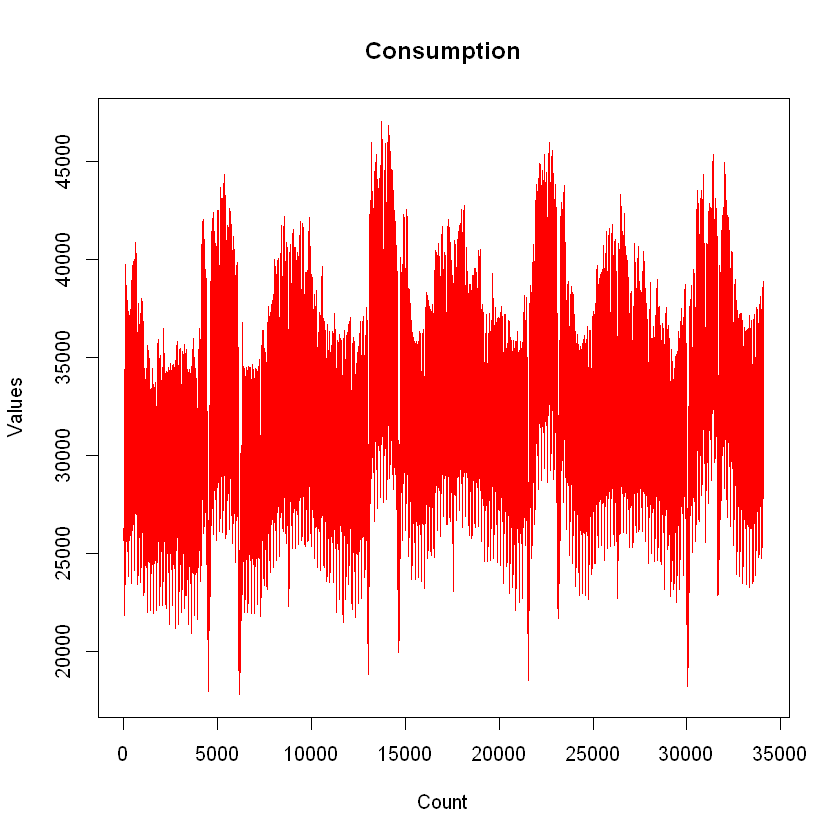

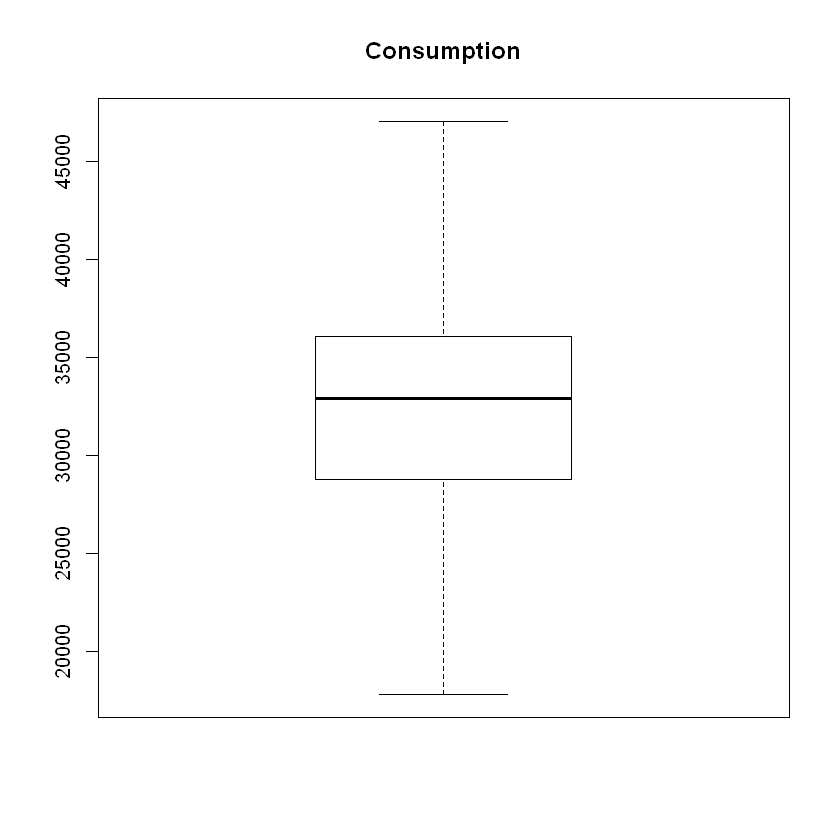

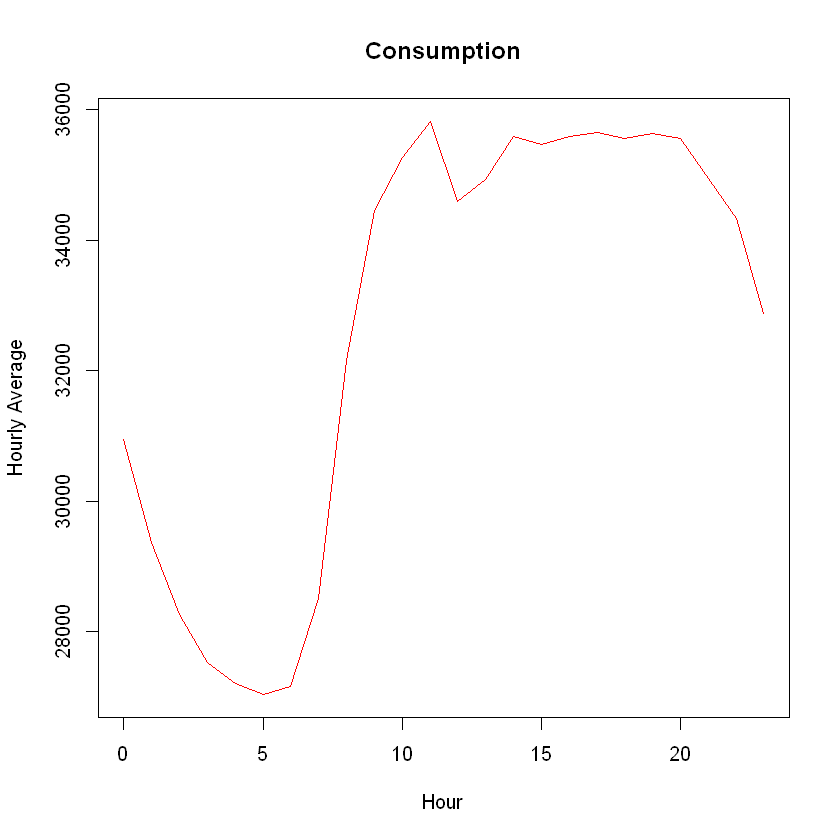

In [7]:
#We draw three plots about our consumption values to have an insight. We see that their mean is around 30000-35000 
#and the minimum and maximum values are around 20000 and 45000 during our whole period according to the first two graphs.
#The third graph shows the average consumption value for each hour in a day. We see that especially in afternoon and evening
#this value becomes the biggest.
plot(consumption[,3],type="l",col=2,main="Consumption",xlab="Count",ylab="Values")
boxplot(consumption[,3],main="Consumption")
plot(consumption[,c(3,4)] %>% group_by(Hour) %>% summarise_all("mean"),type="l",col=2,main="Consumption",xlab="Hour"
     ,ylab="Hourly Average")

In [8]:
#Here we define the observation numbers (boundaries) that we are going to use in our train and test data and produce these data 
#according to these numbers. Generally, we use consumption values as y and consumption values of 48 hours ago as x in our train 
#and test data.
train_y_obs1=49
train_y_obs2=consumption[(consumption$Tarih=='31.10.2019') & (consumption$Saat=='23:00'),'Observation']
train_x_obs1=1
train_x_obs2=train_y_obs2-48
train_x=consumption[(train_x_obs1 <= consumption$Observation) & (consumption$Observation <= train_x_obs2),3]
train_y=consumption[(train_y_obs1 <= consumption$Observation) & (consumption$Observation <= train_y_obs2),3]

test_y_obs1=train_y_obs2+49
test_y_obs2=max(consumption$Observation)
test_x_obs1=train_y_obs2+1
test_x_obs2=test_y_obs2-48
test_x=consumption[(test_x_obs1 <= consumption$Observation) & (consumption$Observation <= test_x_obs2),3]
test_y=consumption[(test_y_obs1 <= consumption$Observation) & (consumption$Observation <= test_y_obs2),3]

#We produce our linear regression model and make our predictions with our test data.
model=lm(train_y ~ train_x)
prediction_y=predict(model,data.frame(train_x=test_x))
#We find our mape values for our prediction.
mape_48h=(sum(abs((as.data.frame(prediction_y) - as.data.frame(test_y)) / as.data.frame(test_y)))/length(test_y)) * 100
print(paste('MAPE for naive approach with 48 hours is ',mape_48h))
#We keep our model as model_48h.
model_48h=model

[1] "MAPE for naive approach with 48 hours is  7.88542230867725"


In [9]:
#Let's put mape values in a vector for each hour in the test period.
mape_48h_list=vector()
for (i in 1:24){
    mape=(sum(abs((as.data.frame(prediction_y[seq(i,length(prediction_y),24)]) - as.data.frame(test_y[seq(i,length(prediction_y),24)])) / as.data.frame(test_y[seq(i,length(prediction_y),24)])))/length(test_y[seq(i,length(prediction_y),24)])) * 100
    mape_48h_list=c(mape_48h_list,mape)
}

[1] "The mean for MAPE values for each hour over the test period is 7.88542230867725. This is consistent with the result found above."


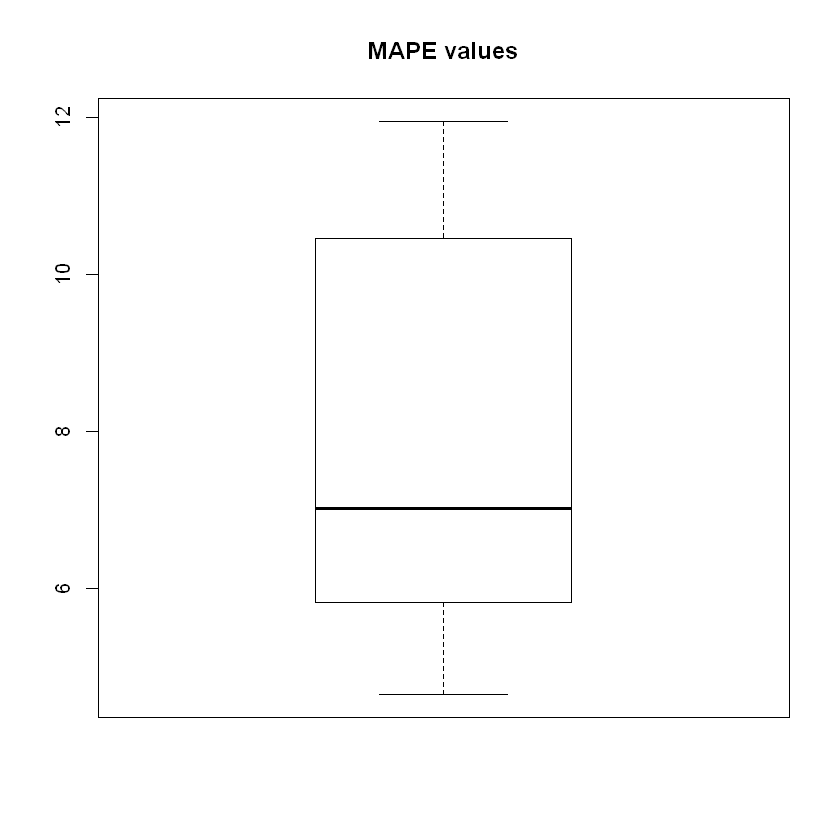

In [10]:
#Let's check the consistency between mean of these mape values and the mape value found above. They must be equal.
#Let's also draw a boxplot diagram for these mape values.
print(paste0("The mean for MAPE values for each hour over the test period is ",mean(mape_48h_list),". This is consistent with the result found above."))
boxplot(mape_48h_list,main="MAPE values")

In [11]:
#Here we define the observation numbers (boundaries) that we are going to use in our train and test data and produce these data 
#according to these numbers. Generally, we use consumption values as y and consumption values of 168 hours ago as x in our train 
#and test data.
train_y_obs1=169
train_y_obs2=consumption[(consumption$Tarih=='31.10.2019') & (consumption$Saat=='23:00'),'Observation']
train_x_obs1=1
train_x_obs2=train_y_obs2-168
train_x=consumption[(train_x_obs1 <= consumption$Observation) & (consumption$Observation <= train_x_obs2),3]
train_y=consumption[(train_y_obs1 <= consumption$Observation) & (consumption$Observation <= train_y_obs2),3]

test_y_obs1=train_y_obs2+169
test_y_obs2=max(consumption$Observation)
test_x_obs1=train_y_obs2+1
test_x_obs2=test_y_obs2-168
test_x=consumption[(test_x_obs1 <= consumption$Observation) & (consumption$Observation <= test_x_obs2),3]
test_y=consumption[(test_y_obs1 <= consumption$Observation) & (consumption$Observation <= test_y_obs2),3]

#We produce our linear regression model and make our predictions with our test data.
model=lm(train_y ~ train_x)
prediction_y=predict(model,data.frame(train_x=test_x))
#We find our mape values for our prediction.
mape_168h=(sum(abs((as.data.frame(prediction_y) - as.data.frame(test_y)) / as.data.frame(test_y)))/length(test_y)) * 100
print(paste('MAPE for naive approach with 168 hours is ',mape_168h))
#We keep our model as model_168h.
model_168h=model

[1] "MAPE for naive approach with 168 hours is  2.33317139964258"


In [12]:
#Let's put mape values in a vector for each hour in the test period.
mape_168h_list=vector()
for (i in 1:24){
    mape=(sum(abs((as.data.frame(prediction_y[seq(i,length(prediction_y),24)]) - as.data.frame(test_y[seq(i,length(prediction_y),24)])) / as.data.frame(test_y[seq(i,length(prediction_y),24)])))/length(test_y[seq(i,length(prediction_y),24)])) * 100
    mape_168h_list=c(mape_168h_list,mape)
}

[1] "The mean for MAPE values for each hour over the test period is 2.33317139964258. This is consistent with the result found above."


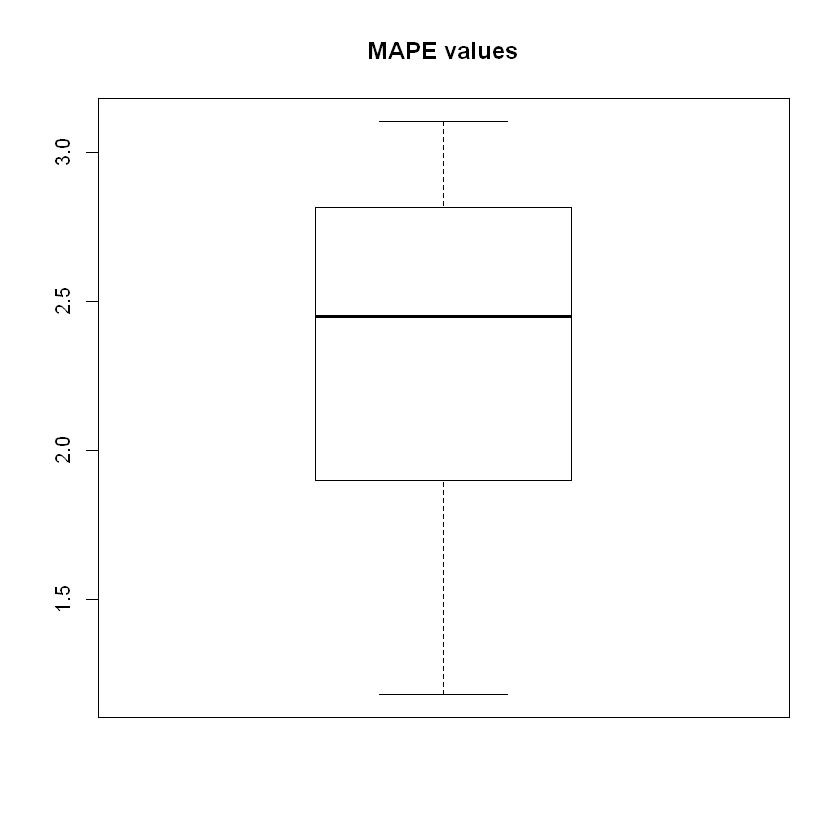

In [13]:
#Let's check the consistency between mean of these mape values and the mape value found above. They must be equal.
#Let's also draw a boxplot diagram for these mape values.
print(paste0("The mean for MAPE values for each hour over the test period is ",mean(mape_168h_list),". This is consistent with the result found above."))
boxplot(mape_168h_list,main="MAPE values")

# Task b

In [14]:
#Let's again define the observation numbers (boundaries) that we are going to use while producing our training data.
train_y_obs1=169
train_y_obs2=consumption[(consumption$Tarih=='31.10.2019') & (consumption$Saat=='23:00'),'Observation']
train_x2_obs1=1
train_x2_obs2=train_y_obs2-168
train_x1_obs1=121
train_x1_obs2=train_y_obs2-48
#We choose our training data for x1(data for 48 hours ago)
train_x1=consumption[(train_x1_obs1 <= consumption$Observation) & (consumption$Observation <= train_x1_obs2),3]
#We put this data into our previous model to use our forecast as feature. Here, we obtain our forecast.
train_x1=predict(model_48h,data.frame(train_x=train_x1))
#We choose our training data for x2(data for 168 hours ago)
train_x2=consumption[(train_x2_obs1 <= consumption$Observation) & (consumption$Observation <= train_x2_obs2),3]
#We put this data into our previous model to use our forecast as feature. Here, we obtain our forecast.
train_x2=predict(model_168h,data.frame(train_x=train_x2))
#We produce our target variable of training data.
train_y=consumption[(train_y_obs1 <= consumption$Observation) & (consumption$Observation <= train_y_obs2),3]
#We produce our new model. We use our forecast (train_x1, train_x2) as feature.
model=lm(train_y ~ train_x1 + train_x2)

#Let's again define the observation numbers that we are going to use while producing our test data.
test_y_obs1=train_y_obs2+169
test_y_obs2=max(consumption$Observation)
test_x2_obs1=train_y_obs2+1
test_x2_obs2=test_y_obs2-168
test_x1_obs1=train_y_obs2+121
test_x1_obs2=test_y_obs2-48

#We choose our test data for x1(data for 48 hours ago)
test_x1=consumption[(test_x1_obs1 <= consumption$Observation) & (consumption$Observation <= test_x1_obs2),3]
#We put this data into our previous model to use our forecast as feature. Here, we obtain our forecast.
test_x1=predict(model_48h,data.frame(train_x=test_x1))
#We choose our test data for x2(data for 168 hours ago)
test_x2=consumption[(test_x2_obs1 <= consumption$Observation) & (consumption$Observation <= test_x2_obs2),3]
#We put this data into our previous model to use our forecast as feature. Here, we obtain our forecast.
test_x2=predict(model_168h,data.frame(train_x=test_x2))
#We produce our target variable of test data.
test_y=consumption[(test_y_obs1 <= consumption$Observation) & (consumption$Observation <= test_y_obs2),3]

#We make our prediction using our test data and the defined model above in this cell. We use our forecast (test_x1, test_x2)
#as feature in this model.
new.train_x1=data.frame(train_x1=test_x1)
new.train_x2=data.frame(train_x2=test_x2)
prediction_y=predict(model,newdata = c(new.train_x1,new.train_x2))

#We find our mape value for our prediction.
mape_task_b=(sum(abs((as.data.frame(prediction_y) - as.data.frame(test_y)) / as.data.frame(test_y)))/length(test_y)) * 100
print(paste('MAPE for the approach in task b is ',mape_task_b))

[1] "MAPE for the approach in task b is  3.4056487029514"


We see that MAPE value increased a bit compared to the MAPE value for naive approach with 168 hours.

In [15]:
#Let's put mape values in a vector for each hour in the test period.
mape_task_b_list=vector()
for (i in 1:24){
    mape=(sum(abs((as.data.frame(prediction_y[seq(i,length(prediction_y),24)]) - as.data.frame(test_y[seq(i,length(prediction_y),24)])) / as.data.frame(test_y[seq(i,length(prediction_y),24)])))/length(test_y[seq(i,length(prediction_y),24)])) * 100
    mape_task_b_list=c(mape_task_b_list,mape)
}

[1] "The mean for MAPE values for each hour over the test period is 3.4056487029514. This is consistent with the result found above."


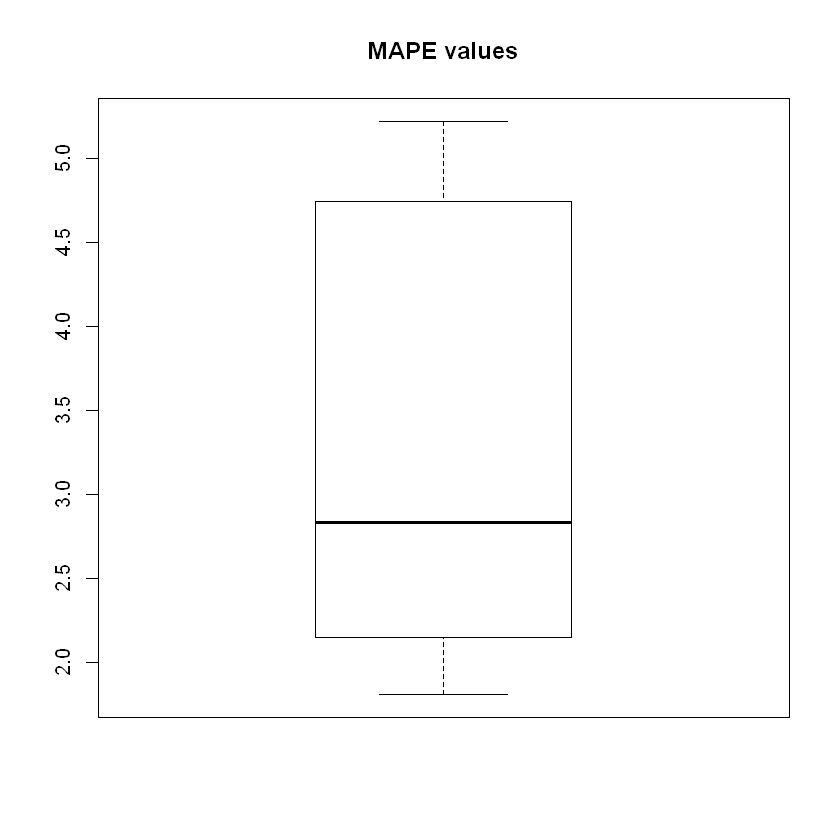

In [16]:
#Let's check the consistency between mean of these mape values and the mape value found above. They must be equal.
#Let's also draw a boxplot diagram for these mape values.
print(paste0("The mean for MAPE values for each hour over the test period is ",mean(mape_task_b_list),". This is consistent with the result found above."))
boxplot(mape_task_b_list,main="MAPE values")

# Task c

In [17]:
#Let's define the observation numbers (boundaries) that we are going to use while producing our training data for our model 
#of 48 hours ago.
train_y_obs1=49
train_y_obs2=consumption[(consumption$Tarih=='31.10.2019') & (consumption$Saat=='23:00'),'Observation']
train_x_obs1=1
train_x_obs2=train_y_obs2-48
train_x=consumption[(train_x_obs1 <= consumption$Observation) & (consumption$Observation <= train_x_obs2),3]
train_y=consumption[(train_y_obs1 <= consumption$Observation) & (consumption$Observation <= train_y_obs2),3]
#Let's extract our 24 training data (training data for each hour) from our training data produced above.
for (i in 1:24){
    assign(paste("train_x_", i, sep=""),train_x[seq(i,length(train_x),24)])
    assign(paste("train_y_", i, sep=""),train_y[seq(i,length(train_y),24)])
}

#Let's define the observation numbers (boundaries) that we are going to use while producing our test data for our model 
#of 48 hours ago.
test_y_obs1=train_y_obs2+49
test_y_obs2=max(consumption$Observation)
test_x_obs1=train_y_obs2+1
test_x_obs2=test_y_obs2-48
test_x=consumption[(test_x_obs1 <= consumption$Observation) & (consumption$Observation <= test_x_obs2),3]
test_y=consumption[(test_y_obs1 <= consumption$Observation) & (consumption$Observation <= test_y_obs2),3]

#Let's extract our 24 test data (test data for each hour) from our test data produced above.
for (i in 1:24){
    assign(paste("test_x_", i, sep=""),test_x[seq(i,length(test_x),24)])
    assign(paste("test_y_", i, sep=""),test_y[seq(i,length(test_y),24)])
}

#Let's define our 24 models for 48 hours ago using 24 training data produced above.
for (i in 1:24){
    assign(paste("model_48h_",i,sep=""),lm(paste("train_y_",i, "~", "train_x_",i,sep="")))
}

#Let's define the observation numbers (boundaries) that we are going to use while producing our training data for our model 
#of 168 hours ago.

train_y_obs1=169
train_y_obs2=consumption[(consumption$Tarih=='31.10.2019') & (consumption$Saat=='23:00'),'Observation']
train_x_obs1=1
train_x_obs2=train_y_obs2-168
train_x=consumption[(train_x_obs1 <= consumption$Observation) & (consumption$Observation <= train_x_obs2),3]
train_y=consumption[(train_y_obs1 <= consumption$Observation) & (consumption$Observation <= train_y_obs2),3]

#Let's extract our 24 training data (training data for each hour) from our training data produced above.

for (i in 1:24){
    assign(paste("train_x_", i, sep=""),train_x[seq(i,length(train_x),24)])
    assign(paste("train_y_", i, sep=""),train_y[seq(i,length(train_y),24)])
}

#Let's define the observation numbers (boundaries) that we are going to use while producing our test data for our model 
#of 168 hours ago.

test_y_obs1=train_y_obs2+169
test_y_obs2=max(consumption$Observation)
test_x_obs1=train_y_obs2+1
test_x_obs2=test_y_obs2-168
test_x=consumption[(test_x_obs1 <= consumption$Observation) & (consumption$Observation <= test_x_obs2),3]
test_y=consumption[(test_y_obs1 <= consumption$Observation) & (consumption$Observation <= test_y_obs2),3]

#Let's extract our 24 test data (test data for each hour) from our test data produced above.

for (i in 1:24){
    assign(paste("test_x_", i, sep=""),test_x[seq(i,length(test_x),24)])
    assign(paste("test_y_", i, sep=""),test_y[seq(i,length(test_y),24)])
}

#Let's define our 24 models for 168 hours ago using 24 training data produced above.

for (i in 1:24){
    assign(paste("model_168h_",i,sep=""),lm(paste("train_y_",i, "~", "train_x_",i,sep="")))
}

In [18]:
#Let's again define the observation numbers (boundaries) that we are going to use while producing our training data.
train_y_obs1=169
train_y_obs2=consumption[(consumption$Tarih=='31.10.2019') & (consumption$Saat=='23:00'),'Observation']
train_x2_obs1=1
train_x2_obs2=train_y_obs2-168
train_x1_obs1=121
train_x1_obs2=train_y_obs2-48
#Let's produce our training data as a whole.
train_x1=consumption[(train_x1_obs1 <= consumption$Observation) & (consumption$Observation <= train_x1_obs2),3]
train_x2=consumption[(train_x2_obs1 <= consumption$Observation) & (consumption$Observation <= train_x2_obs2),3]
train_y=consumption[(train_y_obs1 <= consumption$Observation) & (consumption$Observation <= train_y_obs2),3]
#Let's extract our 24 training data (training data for each hour) from our training data produced above.
for (i in 1:24){
    assign(paste("train_x1_", i, sep=""),train_x1[seq(i,length(train_x1),24)])
    assign(paste("train_x2_", i, sep=""),train_x2[seq(i,length(train_x2),24)])
    assign(paste("train_y_", i, sep=""),train_y[seq(i,length(train_y),24)])
}

#Let's predict our training data following the logic in task b using our models and training data found for 24 hours. We again
#use our forecast as feature.

#The following code (to be used in a loop) does not work. So I wrote the codes one by one manually. 
#assign(paste("train_x1_",i,sep=""),predict(paste("model_48h_",i,sep=""),data.frame(assign(paste("train_x_",i,sep="")
#                                                                                          ,paste("train_x1_",i,sep="")))))

#We start with the data and models for 48 hours ago and produce our training data. We make our forecasts to use as our features.
train_x1_1=predict(model_48h_1,data.frame(train_x_1=train_x1_1))
train_x1_2=predict(model_48h_2,data.frame(train_x_2=train_x1_2))
train_x1_3=predict(model_48h_3,data.frame(train_x_3=train_x1_3))
train_x1_4=predict(model_48h_4,data.frame(train_x_4=train_x1_4))
train_x1_5=predict(model_48h_5,data.frame(train_x_5=train_x1_5))
train_x1_6=predict(model_48h_6,data.frame(train_x_6=train_x1_6))
train_x1_7=predict(model_48h_7,data.frame(train_x_7=train_x1_7))
train_x1_8=predict(model_48h_8,data.frame(train_x_8=train_x1_8))
train_x1_9=predict(model_48h_9,data.frame(train_x_9=train_x1_9))
train_x1_10=predict(model_48h_10,data.frame(train_x_10=train_x1_10))
train_x1_11=predict(model_48h_11,data.frame(train_x_11=train_x1_11))
train_x1_12=predict(model_48h_12,data.frame(train_x_12=train_x1_12))
train_x1_13=predict(model_48h_13,data.frame(train_x_13=train_x1_13))
train_x1_14=predict(model_48h_14,data.frame(train_x_14=train_x1_14))
train_x1_15=predict(model_48h_15,data.frame(train_x_15=train_x1_15))
train_x1_16=predict(model_48h_16,data.frame(train_x_16=train_x1_16))
train_x1_17=predict(model_48h_17,data.frame(train_x_17=train_x1_17))
train_x1_18=predict(model_48h_18,data.frame(train_x_18=train_x1_18))
train_x1_19=predict(model_48h_19,data.frame(train_x_19=train_x1_19))
train_x1_20=predict(model_48h_20,data.frame(train_x_20=train_x1_20))
train_x1_21=predict(model_48h_21,data.frame(train_x_21=train_x1_21))
train_x1_22=predict(model_48h_22,data.frame(train_x_22=train_x1_22))
train_x1_23=predict(model_48h_23,data.frame(train_x_23=train_x1_23))
train_x1_24=predict(model_48h_24,data.frame(train_x_24=train_x1_24))


#We continue with the data and models for 168 hours ago and produce our training data. We make our forecasts to use as our 
#features.
train_x2_1=predict(model_168h_1,data.frame(train_x_1=train_x2_1))
train_x2_2=predict(model_168h_2,data.frame(train_x_2=train_x2_2))
train_x2_3=predict(model_168h_3,data.frame(train_x_3=train_x2_3))
train_x2_4=predict(model_168h_4,data.frame(train_x_4=train_x2_4))
train_x2_5=predict(model_168h_5,data.frame(train_x_5=train_x2_5))
train_x2_6=predict(model_168h_6,data.frame(train_x_6=train_x2_6))
train_x2_7=predict(model_168h_7,data.frame(train_x_7=train_x2_7))
train_x2_8=predict(model_168h_8,data.frame(train_x_8=train_x2_8))
train_x2_9=predict(model_168h_9,data.frame(train_x_9=train_x2_9))
train_x2_10=predict(model_168h_10,data.frame(train_x_10=train_x2_10))
train_x2_11=predict(model_168h_11,data.frame(train_x_11=train_x2_11))
train_x2_12=predict(model_168h_12,data.frame(train_x_12=train_x2_12))
train_x2_13=predict(model_168h_13,data.frame(train_x_13=train_x2_13))
train_x2_14=predict(model_168h_14,data.frame(train_x_14=train_x2_14))
train_x2_15=predict(model_168h_15,data.frame(train_x_15=train_x2_15))
train_x2_16=predict(model_168h_16,data.frame(train_x_16=train_x2_16))
train_x2_17=predict(model_168h_17,data.frame(train_x_17=train_x2_17))
train_x2_18=predict(model_168h_18,data.frame(train_x_18=train_x2_18))
train_x2_19=predict(model_168h_19,data.frame(train_x_19=train_x2_19))
train_x2_20=predict(model_168h_20,data.frame(train_x_20=train_x2_20))
train_x2_21=predict(model_168h_21,data.frame(train_x_21=train_x2_21))
train_x2_22=predict(model_168h_22,data.frame(train_x_22=train_x2_22))
train_x2_23=predict(model_168h_23,data.frame(train_x_23=train_x2_23))
train_x2_24=predict(model_168h_24,data.frame(train_x_24=train_x2_24))

#We produce our regression models thinking our forecasts as features for each of the 24 hours. We have 24 models.
#We use our predictions obtained above while producing our regression models.
for (i in 1:24){
    assign(paste("model_",i,sep=""),lm(paste("train_y_",i, "~", "train_x1_",i,"+","train_x2_",i,sep="")))
}

#Let's again define the observation numbers that we are going to use while producing our test data.

test_y_obs1=train_y_obs2+169
test_y_obs2=max(consumption$Observation)
test_x2_obs1=train_y_obs2+1
test_x2_obs2=test_y_obs2-168
test_x1_obs1=train_y_obs2+121
test_x1_obs2=test_y_obs2-48


#Let's produce our test data as a whole.

test_x1=consumption[(test_x1_obs1 <= consumption$Observation) & (consumption$Observation <= test_x1_obs2),3]
test_x2=consumption[(test_x2_obs1 <= consumption$Observation) & (consumption$Observation <= test_x2_obs2),3]
test_y=consumption[(test_y_obs1 <= consumption$Observation) & (consumption$Observation <= test_y_obs2),3]

#Let's extract our 24 test data (test data for each hour) from our test data produced above.

for (i in 1:24){
    assign(paste("test_x1_", i, sep=""),test_x1[seq(i,length(test_x1),24)])
    assign(paste("test_x2_", i, sep=""),test_x2[seq(i,length(test_x2),24)])
    assign(paste("test_y_", i, sep=""),test_y[seq(i,length(test_y),24)])    
}

#Let's predict our test data following the logic in task b using our models and test data found for 24 hours. We again
#use our forecast as feature.

#We start with the data and models for 48 hours ago and produce our test data.


test_x1_1=predict(model_48h_1,data.frame(train_x_1=test_x1_1))
test_x1_2=predict(model_48h_2,data.frame(train_x_2=test_x1_2))
test_x1_3=predict(model_48h_3,data.frame(train_x_3=test_x1_3))
test_x1_4=predict(model_48h_4,data.frame(train_x_4=test_x1_4))
test_x1_5=predict(model_48h_5,data.frame(train_x_5=test_x1_5))
test_x1_6=predict(model_48h_6,data.frame(train_x_6=test_x1_6))
test_x1_7=predict(model_48h_7,data.frame(train_x_7=test_x1_7))
test_x1_8=predict(model_48h_8,data.frame(train_x_8=test_x1_8))
test_x1_9=predict(model_48h_9,data.frame(train_x_9=test_x1_9))
test_x1_10=predict(model_48h_10,data.frame(train_x_10=test_x1_10))
test_x1_11=predict(model_48h_11,data.frame(train_x_11=test_x1_11))
test_x1_12=predict(model_48h_12,data.frame(train_x_12=test_x1_12))
test_x1_13=predict(model_48h_13,data.frame(train_x_13=test_x1_13))
test_x1_14=predict(model_48h_14,data.frame(train_x_14=test_x1_14))
test_x1_15=predict(model_48h_15,data.frame(train_x_15=test_x1_15))
test_x1_16=predict(model_48h_16,data.frame(train_x_16=test_x1_16))
test_x1_17=predict(model_48h_17,data.frame(train_x_17=test_x1_17))
test_x1_18=predict(model_48h_18,data.frame(train_x_18=test_x1_18))
test_x1_19=predict(model_48h_19,data.frame(train_x_19=test_x1_19))
test_x1_20=predict(model_48h_20,data.frame(train_x_20=test_x1_20))
test_x1_21=predict(model_48h_21,data.frame(train_x_21=test_x1_21))
test_x1_22=predict(model_48h_22,data.frame(train_x_22=test_x1_22))
test_x1_23=predict(model_48h_23,data.frame(train_x_23=test_x1_23))
test_x1_24=predict(model_48h_24,data.frame(train_x_24=test_x1_24))

#We continue with the data and models for 168 hours ago and produce our test data.


test_x2_1=predict(model_168h_1,data.frame(train_x_1=test_x2_1))
test_x2_2=predict(model_168h_2,data.frame(train_x_2=test_x2_2))
test_x2_3=predict(model_168h_3,data.frame(train_x_3=test_x2_3))
test_x2_4=predict(model_168h_4,data.frame(train_x_4=test_x2_4))
test_x2_5=predict(model_168h_5,data.frame(train_x_5=test_x2_5))
test_x2_6=predict(model_168h_6,data.frame(train_x_6=test_x2_6))
test_x2_7=predict(model_168h_7,data.frame(train_x_7=test_x2_7))
test_x2_8=predict(model_168h_8,data.frame(train_x_8=test_x2_8))
test_x2_9=predict(model_168h_9,data.frame(train_x_9=test_x2_9))
test_x2_10=predict(model_168h_10,data.frame(train_x_10=test_x2_10))
test_x2_11=predict(model_168h_11,data.frame(train_x_11=test_x2_11))
test_x2_12=predict(model_168h_12,data.frame(train_x_12=test_x2_12))
test_x2_13=predict(model_168h_13,data.frame(train_x_13=test_x2_13))
test_x2_14=predict(model_168h_14,data.frame(train_x_14=test_x2_14))
test_x2_15=predict(model_168h_15,data.frame(train_x_15=test_x2_15))
test_x2_16=predict(model_168h_16,data.frame(train_x_16=test_x2_16))
test_x2_17=predict(model_168h_17,data.frame(train_x_17=test_x2_17))
test_x2_18=predict(model_168h_18,data.frame(train_x_18=test_x2_18))
test_x2_19=predict(model_168h_19,data.frame(train_x_19=test_x2_19))
test_x2_20=predict(model_168h_20,data.frame(train_x_20=test_x2_20))
test_x2_21=predict(model_168h_21,data.frame(train_x_21=test_x2_21))
test_x2_22=predict(model_168h_22,data.frame(train_x_22=test_x2_22))
test_x2_23=predict(model_168h_23,data.frame(train_x_23=test_x2_23))
test_x2_24=predict(model_168h_24,data.frame(train_x_24=test_x2_24))

#Let's make our predictions for each hour using our test data.
#The following code does not work. So we again write manually.

#for (i in 1:24){
#    assign(paste("new.train_x1_",i,sep=""),data.frame(assign(paste("train_x1_",i,sep=""),paste("test_x1_",i,sep=""))))
#    assign(paste("new.train_x2_",i,sep=""),data.frame(assign(paste("train_x2_",i,sep=""),paste("test_x2_",i,sep=""))))
#}

new.train_x1_1=data.frame(train_x1_1=test_x1_1)
new.train_x2_1=data.frame(train_x2_1=test_x2_1)
new.train_x1_2=data.frame(train_x1_2=test_x1_2)
new.train_x2_2=data.frame(train_x2_2=test_x2_2)
new.train_x1_3=data.frame(train_x1_3=test_x1_3)
new.train_x2_3=data.frame(train_x2_3=test_x2_3)
new.train_x1_4=data.frame(train_x1_4=test_x1_4)
new.train_x2_4=data.frame(train_x2_4=test_x2_4)
new.train_x1_5=data.frame(train_x1_5=test_x1_5)
new.train_x2_5=data.frame(train_x2_5=test_x2_5)
new.train_x1_6=data.frame(train_x1_6=test_x1_6)
new.train_x2_6=data.frame(train_x2_6=test_x2_6)
new.train_x1_7=data.frame(train_x1_7=test_x1_7)
new.train_x2_7=data.frame(train_x2_7=test_x2_7)
new.train_x1_8=data.frame(train_x1_8=test_x1_8)
new.train_x2_8=data.frame(train_x2_8=test_x2_8)
new.train_x1_9=data.frame(train_x1_9=test_x1_9)
new.train_x2_9=data.frame(train_x2_9=test_x2_9)
new.train_x1_10=data.frame(train_x1_10=test_x1_10)
new.train_x2_10=data.frame(train_x2_10=test_x2_10)
new.train_x1_11=data.frame(train_x1_11=test_x1_11)
new.train_x2_11=data.frame(train_x2_11=test_x2_11)
new.train_x1_12=data.frame(train_x1_12=test_x1_12)
new.train_x2_12=data.frame(train_x2_12=test_x2_12)
new.train_x1_13=data.frame(train_x1_13=test_x1_13)
new.train_x2_13=data.frame(train_x2_13=test_x2_13)
new.train_x1_14=data.frame(train_x1_14=test_x1_14)
new.train_x2_14=data.frame(train_x2_14=test_x2_14)
new.train_x1_15=data.frame(train_x1_15=test_x1_15)
new.train_x2_15=data.frame(train_x2_15=test_x2_15)
new.train_x1_16=data.frame(train_x1_16=test_x1_16)
new.train_x2_16=data.frame(train_x2_16=test_x2_16)
new.train_x1_17=data.frame(train_x1_17=test_x1_17)
new.train_x2_17=data.frame(train_x2_17=test_x2_17)
new.train_x1_18=data.frame(train_x1_18=test_x1_18)
new.train_x2_18=data.frame(train_x2_18=test_x2_18)
new.train_x1_19=data.frame(train_x1_19=test_x1_19)
new.train_x2_19=data.frame(train_x2_19=test_x2_19)
new.train_x1_20=data.frame(train_x1_20=test_x1_20)
new.train_x2_20=data.frame(train_x2_20=test_x2_20)
new.train_x1_21=data.frame(train_x1_21=test_x1_21)
new.train_x2_21=data.frame(train_x2_21=test_x2_21)
new.train_x1_22=data.frame(train_x1_22=test_x1_22)
new.train_x2_22=data.frame(train_x2_22=test_x2_22)
new.train_x1_23=data.frame(train_x1_23=test_x1_23)
new.train_x2_23=data.frame(train_x2_23=test_x2_23)
new.train_x1_24=data.frame(train_x1_24=test_x1_24)
new.train_x2_24=data.frame(train_x2_24=test_x2_24)
#We make our predictions for each hour using our test data and previously defined models.
prediction_y_1=predict(model_1,newdata=c(new.train_x1_1,new.train_x2_1))
prediction_y_2=predict(model_2,newdata=c(new.train_x1_2,new.train_x2_2))
prediction_y_3=predict(model_3,newdata=c(new.train_x1_3,new.train_x2_3))
prediction_y_4=predict(model_4,newdata=c(new.train_x1_4,new.train_x2_4))
prediction_y_5=predict(model_5,newdata=c(new.train_x1_5,new.train_x2_5))
prediction_y_6=predict(model_6,newdata=c(new.train_x1_6,new.train_x2_6))
prediction_y_7=predict(model_7,newdata=c(new.train_x1_7,new.train_x2_7))
prediction_y_8=predict(model_8,newdata=c(new.train_x1_8,new.train_x2_8))
prediction_y_9=predict(model_9,newdata=c(new.train_x1_9,new.train_x2_9))
prediction_y_10=predict(model_10,newdata=c(new.train_x1_10,new.train_x2_10))
prediction_y_11=predict(model_11,newdata=c(new.train_x1_11,new.train_x2_11))
prediction_y_12=predict(model_12,newdata=c(new.train_x1_12,new.train_x2_12))
prediction_y_13=predict(model_13,newdata=c(new.train_x1_13,new.train_x2_13))
prediction_y_14=predict(model_14,newdata=c(new.train_x1_14,new.train_x2_14))
prediction_y_15=predict(model_15,newdata=c(new.train_x1_15,new.train_x2_15))
prediction_y_16=predict(model_16,newdata=c(new.train_x1_16,new.train_x2_16))
prediction_y_17=predict(model_17,newdata=c(new.train_x1_17,new.train_x2_17))
prediction_y_18=predict(model_18,newdata=c(new.train_x1_18,new.train_x2_18))
prediction_y_19=predict(model_19,newdata=c(new.train_x1_19,new.train_x2_19))
prediction_y_20=predict(model_20,newdata=c(new.train_x1_20,new.train_x2_20))
prediction_y_21=predict(model_21,newdata=c(new.train_x1_21,new.train_x2_21))
prediction_y_22=predict(model_22,newdata=c(new.train_x1_22,new.train_x2_22))
prediction_y_23=predict(model_23,newdata=c(new.train_x1_23,new.train_x2_23))
prediction_y_24=predict(model_24,newdata=c(new.train_x1_24,new.train_x2_24))


In [19]:
#We produce our prediction vector and fill inside of it with our predictions for each hour and each day in the right order
#in order to make a healthy comparison.
prediction_y=vector()
for (i in 1:length(prediction_y_1)){
    prediction_y=c(prediction_y,prediction_y_1[i])
    prediction_y=c(prediction_y,prediction_y_2[i])
    prediction_y=c(prediction_y,prediction_y_3[i])
    prediction_y=c(prediction_y,prediction_y_4[i])
    prediction_y=c(prediction_y,prediction_y_5[i])
    prediction_y=c(prediction_y,prediction_y_6[i])
    prediction_y=c(prediction_y,prediction_y_7[i])
    prediction_y=c(prediction_y,prediction_y_8[i])
    prediction_y=c(prediction_y,prediction_y_9[i])
    prediction_y=c(prediction_y,prediction_y_10[i])
    prediction_y=c(prediction_y,prediction_y_11[i])
    prediction_y=c(prediction_y,prediction_y_12[i])
    prediction_y=c(prediction_y,prediction_y_13[i])
    prediction_y=c(prediction_y,prediction_y_14[i])
    prediction_y=c(prediction_y,prediction_y_15[i])
    prediction_y=c(prediction_y,prediction_y_16[i])
    prediction_y=c(prediction_y,prediction_y_17[i])
    prediction_y=c(prediction_y,prediction_y_18[i])
    prediction_y=c(prediction_y,prediction_y_19[i])
    prediction_y=c(prediction_y,prediction_y_20[i])
    prediction_y=c(prediction_y,prediction_y_21[i])
    prediction_y=c(prediction_y,prediction_y_22[i])
    prediction_y=c(prediction_y,prediction_y_23[i])
    prediction_y=c(prediction_y,prediction_y_24[i])
}

#We compare our prediction vector with real data (test y) and find our mape value.

mape_task_c=(sum(abs((as.data.frame(prediction_y) - as.data.frame(test_y)) / as.data.frame(test_y)))/length(test_y)) * 100
print(paste('MAPE for the approach in task c is ',mape_task_c))



[1] "MAPE for the approach in task c is  3.59434493086328"


We see that MAPE value slightly increased in task c compared to the MAPE value in task b.

In [20]:
#Let's put mape values in a vector for each hour in the test period.
mape_task_c_list=vector()
for (i in 1:24){
    mape=(sum(abs((as.data.frame(prediction_y[seq(i,length(prediction_y),24)]) - as.data.frame(test_y[seq(i,length(prediction_y),24)])) / as.data.frame(test_y[seq(i,length(prediction_y),24)])))/length(test_y[seq(i,length(prediction_y),24)])) * 100
    mape_task_c_list=c(mape_task_c_list,mape)
}

[1] "The mean for MAPE values for each hour over the test period is 3.59434493086328. This is consistent with the result found above."


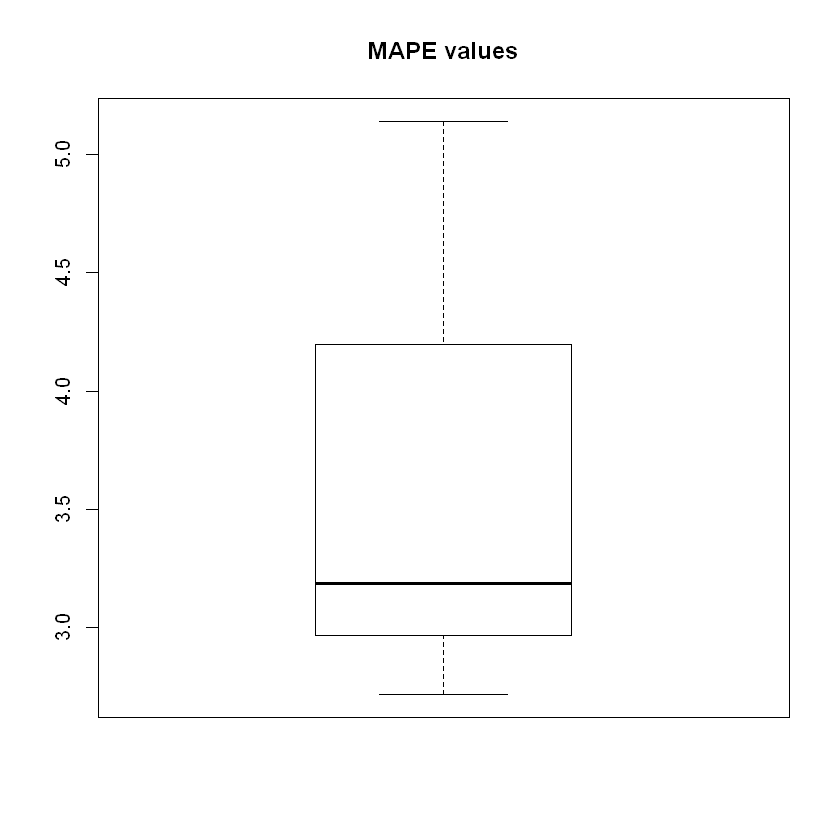

In [21]:
#Let's check the consistency between mean of these mape values and the mape value found above. They must be equal.
#Let's also draw a boxplot diagram for these mape values.
print(paste0("The mean for MAPE values for each hour over the test period is ",mean(mape_task_c_list),". This is consistent with the result found above."))
boxplot(mape_task_c_list,main="MAPE values")

# Task d

In [22]:
#Let's again define the observation numbers (boundaries) that we are going to use while producing our training data.

train_y_obs1=169
train_y_obs2=consumption[(consumption$Tarih=='31.10.2019') & (consumption$Saat=='23:00'),'Observation']
train_x2_obs1=1
train_x2_obs2=train_y_obs2-168
train_x1_obs1=121
train_x1_obs2=train_y_obs2-48

#Let's produce our training data as a whole.
train_x1=consumption[(train_x1_obs1 <= consumption$Observation) & (consumption$Observation <= train_x1_obs2),3]
train_x2=consumption[(train_x2_obs1 <= consumption$Observation) & (consumption$Observation <= train_x2_obs2),3]
train_y=consumption[(train_y_obs1 <= consumption$Observation) & (consumption$Observation <= train_y_obs2),3]

#Let's extract the 48 columns from hour training data.
for (i in 0:23){
    assign(paste("train_lag_day2_hour_",i,sep=""),train_x1[seq(i+1,length(train_x1),24)])
    assign(paste("train_lag_day7_hour_",i,sep=""),train_x2[seq(i+1,length(train_x2),24)])
}

train_lag_day2_hour_0=rep(train_lag_day2_hour_0,each=24)
train_lag_day7_hour_0=rep(train_lag_day7_hour_0,each=24)
train_lag_day2_hour_1=rep(train_lag_day2_hour_1,each=24)
train_lag_day7_hour_1=rep(train_lag_day7_hour_1,each=24)
train_lag_day2_hour_2=rep(train_lag_day2_hour_2,each=24)
train_lag_day7_hour_2=rep(train_lag_day7_hour_2,each=24)
train_lag_day2_hour_3=rep(train_lag_day2_hour_3,each=24)
train_lag_day7_hour_3=rep(train_lag_day7_hour_3,each=24)
train_lag_day2_hour_4=rep(train_lag_day2_hour_4,each=24)
train_lag_day7_hour_4=rep(train_lag_day7_hour_4,each=24)
train_lag_day2_hour_5=rep(train_lag_day2_hour_5,each=24)
train_lag_day7_hour_5=rep(train_lag_day7_hour_5,each=24)
train_lag_day2_hour_6=rep(train_lag_day2_hour_6,each=24)
train_lag_day7_hour_6=rep(train_lag_day7_hour_6,each=24)
train_lag_day2_hour_7=rep(train_lag_day2_hour_7,each=24)
train_lag_day7_hour_8=rep(train_lag_day7_hour_7,each=24)
train_lag_day2_hour_8=rep(train_lag_day2_hour_8,each=24)
train_lag_day7_hour_8=rep(train_lag_day7_hour_8,each=24)
train_lag_day2_hour_9=rep(train_lag_day2_hour_9,each=24)
train_lag_day7_hour_9=rep(train_lag_day7_hour_9,each=24)
train_lag_day2_hour_10=rep(train_lag_day2_hour_10,each=24)
train_lag_day7_hour_10=rep(train_lag_day7_hour_10,each=24)
train_lag_day2_hour_11=rep(train_lag_day2_hour_11,each=24)
train_lag_day7_hour_11=rep(train_lag_day7_hour_11,each=24)
train_lag_day2_hour_12=rep(train_lag_day2_hour_12,each=24)
train_lag_day7_hour_12=rep(train_lag_day7_hour_12,each=24)
train_lag_day2_hour_13=rep(train_lag_day2_hour_13,each=24)
train_lag_day7_hour_13=rep(train_lag_day7_hour_13,each=24)
train_lag_day2_hour_14=rep(train_lag_day2_hour_14,each=24)
train_lag_day7_hour_14=rep(train_lag_day7_hour_14,each=24)
train_lag_day2_hour_15=rep(train_lag_day2_hour_15,each=24)
train_lag_day7_hour_15=rep(train_lag_day7_hour_15,each=24)
train_lag_day2_hour_16=rep(train_lag_day2_hour_16,each=24)
train_lag_day7_hour_16=rep(train_lag_day7_hour_16,each=24)
train_lag_day2_hour_17=rep(train_lag_day2_hour_17,each=24)
train_lag_day7_hour_17=rep(train_lag_day7_hour_17,each=24)
train_lag_day2_hour_18=rep(train_lag_day2_hour_18,each=24)
train_lag_day7_hour_18=rep(train_lag_day7_hour_18,each=24)
train_lag_day2_hour_19=rep(train_lag_day2_hour_19,each=24)
train_lag_day7_hour_19=rep(train_lag_day7_hour_19,each=24)
train_lag_day2_hour_20=rep(train_lag_day2_hour_20,each=24)
train_lag_day7_hour_20=rep(train_lag_day7_hour_20,each=24)
train_lag_day2_hour_21=rep(train_lag_day2_hour_21,each=24)
train_lag_day7_hour_21=rep(train_lag_day7_hour_21,each=24)
train_lag_day2_hour_22=rep(train_lag_day2_hour_22,each=24)
train_lag_day7_hour_22=rep(train_lag_day7_hour_22,each=24)
train_lag_day2_hour_23=rep(train_lag_day2_hour_23,each=24)
train_lag_day7_hour_23=rep(train_lag_day7_hour_23,each=24)

#Let's produce our training data as a frame in wide format and print the first rows of it.
training_data=data.frame(train_y,train_lag_day2_hour_0,train_lag_day2_hour_1,train_lag_day2_hour_2,train_lag_day2_hour_3,
train_lag_day2_hour_4,train_lag_day2_hour_5,train_lag_day2_hour_6,train_lag_day2_hour_7,train_lag_day2_hour_8,
train_lag_day2_hour_9,train_lag_day2_hour_10,train_lag_day2_hour_11,train_lag_day2_hour_12,train_lag_day2_hour_13,
train_lag_day2_hour_14,train_lag_day2_hour_15,train_lag_day2_hour_16,train_lag_day2_hour_17,
train_lag_day2_hour_18,train_lag_day2_hour_19,train_lag_day2_hour_20,train_lag_day2_hour_21,train_lag_day2_hour_22,
train_lag_day2_hour_23,train_lag_day7_hour_0,train_lag_day7_hour_1,train_lag_day7_hour_2,train_lag_day7_hour_3,
train_lag_day7_hour_4,train_lag_day7_hour_5,train_lag_day7_hour_6,train_lag_day7_hour_7,train_lag_day7_hour_8,
train_lag_day7_hour_9,train_lag_day7_hour_10,train_lag_day7_hour_11,train_lag_day7_hour_12,train_lag_day7_hour_13,
train_lag_day7_hour_14,train_lag_day7_hour_15,train_lag_day7_hour_16,train_lag_day7_hour_17,
train_lag_day7_hour_18,train_lag_day7_hour_19,train_lag_day7_hour_20,train_lag_day7_hour_21,train_lag_day7_hour_22,
train_lag_day7_hour_23)


head(training_data)

train_y,train_lag_day2_hour_0,train_lag_day2_hour_1,train_lag_day2_hour_2,train_lag_day2_hour_3,train_lag_day2_hour_4,train_lag_day2_hour_5,train_lag_day2_hour_6,train_lag_day2_hour_7,train_lag_day2_hour_8,...,train_lag_day7_hour_14,train_lag_day7_hour_15,train_lag_day7_hour_16,train_lag_day7_hour_17,train_lag_day7_hour_18,train_lag_day7_hour_19,train_lag_day7_hour_20,train_lag_day7_hour_21,train_lag_day7_hour_22,train_lag_day7_hour_23
28602.02,29189.27,27614.02,26578.97,25719.19,25864.63,25918.59,27091.94,28533.05,33203.34,...,29548.32,29390.89,30734.97,32048.02,31438.11,30728.47,30166.14,29461.28,29242.83,28069.09
27112.37,29189.27,27614.02,26578.97,25719.19,25864.63,25918.59,27091.94,28533.05,33203.34,...,29548.32,29390.89,30734.97,32048.02,31438.11,30728.47,30166.14,29461.28,29242.83,28069.09
25975.34,29189.27,27614.02,26578.97,25719.19,25864.63,25918.59,27091.94,28533.05,33203.34,...,29548.32,29390.89,30734.97,32048.02,31438.11,30728.47,30166.14,29461.28,29242.83,28069.09
25315.55,29189.27,27614.02,26578.97,25719.19,25864.63,25918.59,27091.94,28533.05,33203.34,...,29548.32,29390.89,30734.97,32048.02,31438.11,30728.47,30166.14,29461.28,29242.83,28069.09
25128.15,29189.27,27614.02,26578.97,25719.19,25864.63,25918.59,27091.94,28533.05,33203.34,...,29548.32,29390.89,30734.97,32048.02,31438.11,30728.47,30166.14,29461.28,29242.83,28069.09
25356.22,29189.27,27614.02,26578.97,25719.19,25864.63,25918.59,27091.94,28533.05,33203.34,...,29548.32,29390.89,30734.97,32048.02,31438.11,30728.47,30166.14,29461.28,29242.83,28069.09


In [23]:
#Let's extract our different training data for each hour from our training data (the frame defined above)
for (i in 0:23){
    assign(paste("training_data_",i,sep=""),training_data[seq(i+1,nrow(training_data),24),])
}
#Let's also look at the first rows of our training data for 0th and 10th hour.
head(training_data_0)
head(training_data_10)

,train_y,train_lag_day2_hour_0,train_lag_day2_hour_1,train_lag_day2_hour_2,train_lag_day2_hour_3,train_lag_day2_hour_4,train_lag_day2_hour_5,train_lag_day2_hour_6,train_lag_day2_hour_7,train_lag_day2_hour_8,...,train_lag_day7_hour_14,train_lag_day7_hour_15,train_lag_day7_hour_16,train_lag_day7_hour_17,train_lag_day7_hour_18,train_lag_day7_hour_19,train_lag_day7_hour_20,train_lag_day7_hour_21,train_lag_day7_hour_22,train_lag_day7_hour_23
1,28602.02,29189.27,27614.02,26578.97,25719.19,25864.63,25918.59,27091.94,28533.05,33203.34,...,29548.32,29390.89,30734.97,32048.02,31438.11,30728.47,30166.14,29461.28,29242.83,28069.09
25,29906.93,28763.95,27284.84,26321.95,25748.49,25636.58,25932.52,26963.74,28444.83,32804.27,...,32796.18,32594.55,33358.47,34387.95,33591.26,32648.83,31897.73,31049.20,30906.43,29621.09
49,28890.37,28602.02,27112.37,25975.34,25315.55,25128.15,25356.22,26338.72,28086.42,32702.24,...,31056.47,30979.53,32297.46,33462.96,33151.03,32450.21,32093.93,31315.16,31014.19,29462.06
73,27130.75,29906.93,28061.98,26808.78,25798.80,25820.46,26035.77,26451.24,26853.42,30627.32,...,39661.98,39211.00,39760.12,39633.29,37621.41,35954.18,35114.12,34066.40,33686.83,31733.54
97,29161.64,28890.37,27133.75,25656.13,24937.87,24538.16,24616.05,24478.14,23813.35,24676.92,...,38086.11,37834.89,38599.34,38669.63,36954.78,35306.11,34301.59,33400.82,33359.37,31629.97
121,28823.02,27130.75,25403.40,24452.96,23959.85,23839.28,24358.46,25800.81,27336.03,32683.24,...,36847.22,36433.88,37581.09,37304.52,35832.00,34499.94,33670.00,32931.12,32913.06,31450.65


,train_y,train_lag_day2_hour_0,train_lag_day2_hour_1,train_lag_day2_hour_2,train_lag_day2_hour_3,train_lag_day2_hour_4,train_lag_day2_hour_5,train_lag_day2_hour_6,train_lag_day2_hour_7,train_lag_day2_hour_8,...,train_lag_day7_hour_14,train_lag_day7_hour_15,train_lag_day7_hour_16,train_lag_day7_hour_17,train_lag_day7_hour_18,train_lag_day7_hour_19,train_lag_day7_hour_20,train_lag_day7_hour_21,train_lag_day7_hour_22,train_lag_day7_hour_23
11,36843.20,29189.27,27614.02,26578.97,25719.19,25864.63,25918.59,27091.94,28533.05,33203.34,...,29548.32,29390.89,30734.97,32048.02,31438.11,30728.47,30166.14,29461.28,29242.83,28069.09
35,34792.84,28763.95,27284.84,26321.95,25748.49,25636.58,25932.52,26963.74,28444.83,32804.27,...,32796.18,32594.55,33358.47,34387.95,33591.26,32648.83,31897.73,31049.20,30906.43,29621.09
59,28136.07,28602.02,27112.37,25975.34,25315.55,25128.15,25356.22,26338.72,28086.42,32702.24,...,31056.47,30979.53,32297.46,33462.96,33151.03,32450.21,32093.93,31315.16,31014.19,29462.06
83,36707.21,29906.93,28061.98,26808.78,25798.80,25820.46,26035.77,26451.24,26853.42,30627.32,...,39661.98,39211.00,39760.12,39633.29,37621.41,35954.18,35114.12,34066.40,33686.83,31733.54
107,35653.04,28890.37,27133.75,25656.13,24937.87,24538.16,24616.05,24478.14,23813.35,24676.92,...,38086.11,37834.89,38599.34,38669.63,36954.78,35306.11,34301.59,33400.82,33359.37,31629.97
131,36427.94,27130.75,25403.40,24452.96,23959.85,23839.28,24358.46,25800.81,27336.03,32683.24,...,36847.22,36433.88,37581.09,37304.52,35832.00,34499.94,33670.00,32931.12,32913.06,31450.65


In [24]:
#Let's produce our models using our 24 training data. Here lasso regression is applied in the manner stated in the question.
#No data standardization is needed because glmnet function does it by default.
library(glmnet)
cv.fit_0=cv.glmnet(as.matrix(training_data_0[,2:49]),training_data_0[,1],nfolds = 10)
cv.fit_1=cv.glmnet(as.matrix(training_data_1[,2:49]),training_data_1[,1],nfolds = 10)
cv.fit_2=cv.glmnet(as.matrix(training_data_2[,2:49]),training_data_2[,1],nfolds = 10)
cv.fit_3=cv.glmnet(as.matrix(training_data_3[,2:49]),training_data_3[,1],nfolds = 10)
cv.fit_4=cv.glmnet(as.matrix(training_data_4[,2:49]),training_data_4[,1],nfolds = 10)
cv.fit_5=cv.glmnet(as.matrix(training_data_5[,2:49]),training_data_5[,1],nfolds = 10)
cv.fit_6=cv.glmnet(as.matrix(training_data_6[,2:49]),training_data_6[,1],nfolds = 10)
cv.fit_7=cv.glmnet(as.matrix(training_data_7[,2:49]),training_data_7[,1],nfolds = 10)
cv.fit_8=cv.glmnet(as.matrix(training_data_8[,2:49]),training_data_8[,1],nfolds = 10)
cv.fit_9=cv.glmnet(as.matrix(training_data_9[,2:49]),training_data_9[,1],nfolds = 10)
cv.fit_10=cv.glmnet(as.matrix(training_data_10[,2:49]),training_data_10[,1],nfolds = 10)
cv.fit_11=cv.glmnet(as.matrix(training_data_11[,2:49]),training_data_11[,1],nfolds = 10)
cv.fit_12=cv.glmnet(as.matrix(training_data_12[,2:49]),training_data_12[,1],nfolds = 10)
cv.fit_13=cv.glmnet(as.matrix(training_data_13[,2:49]),training_data_13[,1],nfolds = 10)
cv.fit_14=cv.glmnet(as.matrix(training_data_14[,2:49]),training_data_14[,1],nfolds = 10)
cv.fit_15=cv.glmnet(as.matrix(training_data_15[,2:49]),training_data_15[,1],nfolds = 10)
cv.fit_16=cv.glmnet(as.matrix(training_data_16[,2:49]),training_data_16[,1],nfolds = 10)
cv.fit_17=cv.glmnet(as.matrix(training_data_17[,2:49]),training_data_17[,1],nfolds = 10)
cv.fit_18=cv.glmnet(as.matrix(training_data_18[,2:49]),training_data_18[,1],nfolds = 10)
cv.fit_19=cv.glmnet(as.matrix(training_data_19[,2:49]),training_data_19[,1],nfolds = 10)
cv.fit_20=cv.glmnet(as.matrix(training_data_20[,2:49]),training_data_20[,1],nfolds = 10)
cv.fit_21=cv.glmnet(as.matrix(training_data_21[,2:49]),training_data_21[,1],nfolds = 10)
cv.fit_22=cv.glmnet(as.matrix(training_data_22[,2:49]),training_data_22[,1],nfolds = 10)
cv.fit_23=cv.glmnet(as.matrix(training_data_23[,2:49]),training_data_23[,1],nfolds = 10)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-18



In [25]:
#Let's again define the observation numbers (boundaries) that we are going to use while producing our test data.
test_y_obs1=train_y_obs2+169
test_y_obs2=max(consumption$Observation)
test_x2_obs1=train_y_obs2+1
test_x2_obs2=test_y_obs2-168
test_x1_obs1=train_y_obs2+121
test_x1_obs2=test_y_obs2-48

#Let's produce our test data as a whole.

test_x1=consumption[(test_x1_obs1 <= consumption$Observation) & (consumption$Observation <= test_x1_obs2),3]
test_x2=consumption[(test_x2_obs1 <= consumption$Observation) & (consumption$Observation <= test_x2_obs2),3]
test_y=consumption[(test_y_obs1 <= consumption$Observation) & (consumption$Observation <= test_y_obs2),3]

#Let's extract the 48 columns from hour test data.

for (i in 0:23){
    assign(paste("test_lag_day2_hour_",i,sep=""),test_x1[seq(i+1,length(test_x1),24)])
    assign(paste("test_lag_day7_hour_",i,sep=""),test_x2[seq(i+1,length(test_x2),24)])
    
}


test_lag_day2_hour_0=rep(test_lag_day2_hour_0,each=24)
test_lag_day7_hour_0=rep(test_lag_day7_hour_0,each=24)
test_lag_day2_hour_1=rep(test_lag_day2_hour_1,each=24)
test_lag_day7_hour_1=rep(test_lag_day7_hour_1,each=24)
test_lag_day2_hour_2=rep(test_lag_day2_hour_2,each=24)
test_lag_day7_hour_2=rep(test_lag_day7_hour_2,each=24)
test_lag_day2_hour_3=rep(test_lag_day2_hour_3,each=24)
test_lag_day7_hour_3=rep(test_lag_day7_hour_3,each=24)
test_lag_day2_hour_4=rep(test_lag_day2_hour_4,each=24)
test_lag_day7_hour_4=rep(test_lag_day7_hour_4,each=24)
test_lag_day2_hour_5=rep(test_lag_day2_hour_5,each=24)
test_lag_day7_hour_5=rep(test_lag_day7_hour_5,each=24)
test_lag_day2_hour_6=rep(test_lag_day2_hour_6,each=24)
test_lag_day7_hour_6=rep(test_lag_day7_hour_6,each=24)
test_lag_day2_hour_7=rep(test_lag_day2_hour_7,each=24)
test_lag_day7_hour_8=rep(test_lag_day7_hour_7,each=24)
test_lag_day2_hour_8=rep(test_lag_day2_hour_8,each=24)
test_lag_day7_hour_8=rep(test_lag_day7_hour_8,each=24)
test_lag_day2_hour_9=rep(test_lag_day2_hour_9,each=24)
test_lag_day7_hour_9=rep(test_lag_day7_hour_9,each=24)
test_lag_day2_hour_10=rep(test_lag_day2_hour_10,each=24)
test_lag_day7_hour_10=rep(test_lag_day7_hour_10,each=24)
test_lag_day2_hour_11=rep(test_lag_day2_hour_11,each=24)
test_lag_day7_hour_11=rep(test_lag_day7_hour_11,each=24)
test_lag_day2_hour_12=rep(test_lag_day2_hour_12,each=24)
test_lag_day7_hour_12=rep(test_lag_day7_hour_12,each=24)
test_lag_day2_hour_13=rep(test_lag_day2_hour_13,each=24)
test_lag_day7_hour_13=rep(test_lag_day7_hour_13,each=24)
test_lag_day2_hour_14=rep(test_lag_day2_hour_14,each=24)
test_lag_day7_hour_14=rep(test_lag_day7_hour_14,each=24)
test_lag_day2_hour_15=rep(test_lag_day2_hour_15,each=24)
test_lag_day7_hour_15=rep(test_lag_day7_hour_15,each=24)
test_lag_day2_hour_16=rep(test_lag_day2_hour_16,each=24)
test_lag_day7_hour_16=rep(test_lag_day7_hour_16,each=24)
test_lag_day2_hour_17=rep(test_lag_day2_hour_17,each=24)
test_lag_day7_hour_17=rep(test_lag_day7_hour_17,each=24)
test_lag_day2_hour_18=rep(test_lag_day2_hour_18,each=24)
test_lag_day7_hour_18=rep(test_lag_day7_hour_18,each=24)
test_lag_day2_hour_19=rep(test_lag_day2_hour_19,each=24)
test_lag_day7_hour_19=rep(test_lag_day7_hour_19,each=24)
test_lag_day2_hour_20=rep(test_lag_day2_hour_20,each=24)
test_lag_day7_hour_20=rep(test_lag_day7_hour_20,each=24)
test_lag_day2_hour_21=rep(test_lag_day2_hour_21,each=24)
test_lag_day7_hour_21=rep(test_lag_day7_hour_21,each=24)
test_lag_day2_hour_22=rep(test_lag_day2_hour_22,each=24)
test_lag_day7_hour_22=rep(test_lag_day7_hour_22,each=24)
test_lag_day2_hour_23=rep(test_lag_day2_hour_23,each=24)
test_lag_day7_hour_23=rep(test_lag_day7_hour_23,each=24)

#Let's produce our test data as a frame in wide format.
testing_data=data.frame(test_y,test_lag_day2_hour_0,test_lag_day2_hour_1,test_lag_day2_hour_2,test_lag_day2_hour_3,
test_lag_day2_hour_4,test_lag_day2_hour_5,test_lag_day2_hour_6,test_lag_day2_hour_7,test_lag_day2_hour_8,
test_lag_day2_hour_9,test_lag_day2_hour_10,test_lag_day2_hour_11,test_lag_day2_hour_12,test_lag_day2_hour_13,
test_lag_day2_hour_14,test_lag_day2_hour_15,test_lag_day2_hour_16,test_lag_day2_hour_17,
test_lag_day2_hour_18,test_lag_day2_hour_19,test_lag_day2_hour_20,test_lag_day2_hour_21,test_lag_day2_hour_22,
test_lag_day2_hour_23,test_lag_day7_hour_0,test_lag_day7_hour_1,test_lag_day7_hour_2,test_lag_day7_hour_3,
test_lag_day7_hour_4,test_lag_day7_hour_5,test_lag_day7_hour_6,test_lag_day7_hour_7,test_lag_day7_hour_8,
test_lag_day7_hour_9,test_lag_day7_hour_10,test_lag_day7_hour_11,test_lag_day7_hour_12,test_lag_day7_hour_13,
test_lag_day7_hour_14,test_lag_day7_hour_15,test_lag_day7_hour_16,test_lag_day7_hour_17,
test_lag_day7_hour_18,test_lag_day7_hour_19,test_lag_day7_hour_20,test_lag_day7_hour_21,test_lag_day7_hour_22,
test_lag_day7_hour_23)

#Let's extract our different test data for each hour from our test data (the frame defined above)

for (i in 0:23){
    assign(paste("testing_data_",i,sep=""),testing_data[seq(i+1,nrow(testing_data),24),])
}

In [26]:
#Let's make our predictions for each hour using our models and test data.
#s value (value of the penalty parameter lambda) is used as lambda.min which is the value of lambda that gives the minimum
#cvm(mean cross-validated error).
prediction_y_0=predict(cv.fit_0,newx=as.matrix(testing_data_0[,2:49]),s=cv.fit_0$lambda.min)
prediction_y_1=predict(cv.fit_1,newx=as.matrix(testing_data_1[,2:49]),s=cv.fit_1$lambda.min)
prediction_y_2=predict(cv.fit_2,newx=as.matrix(testing_data_2[,2:49]),s=cv.fit_2$lambda.min)
prediction_y_3=predict(cv.fit_3,newx=as.matrix(testing_data_3[,2:49]),s=cv.fit_3$lambda.min)
prediction_y_4=predict(cv.fit_4,newx=as.matrix(testing_data_4[,2:49]),s=cv.fit_4$lambda.min)
prediction_y_5=predict(cv.fit_5,newx=as.matrix(testing_data_5[,2:49]),s=cv.fit_5$lambda.min)
prediction_y_6=predict(cv.fit_6,newx=as.matrix(testing_data_6[,2:49]),s=cv.fit_6$lambda.min)
prediction_y_7=predict(cv.fit_7,newx=as.matrix(testing_data_7[,2:49]),s=cv.fit_7$lambda.min)
prediction_y_8=predict(cv.fit_8,newx=as.matrix(testing_data_8[,2:49]),s=cv.fit_8$lambda.min)
prediction_y_9=predict(cv.fit_9,newx=as.matrix(testing_data_9[,2:49]),s=cv.fit_9$lambda.min)
prediction_y_10=predict(cv.fit_10,newx=as.matrix(testing_data_10[,2:49]),s=cv.fit_10$lambda.min)
prediction_y_11=predict(cv.fit_11,newx=as.matrix(testing_data_11[,2:49]),s=cv.fit_11$lambda.min)
prediction_y_12=predict(cv.fit_12,newx=as.matrix(testing_data_12[,2:49]),s=cv.fit_12$lambda.min)
prediction_y_13=predict(cv.fit_13,newx=as.matrix(testing_data_13[,2:49]),s=cv.fit_13$lambda.min)
prediction_y_14=predict(cv.fit_14,newx=as.matrix(testing_data_14[,2:49]),s=cv.fit_14$lambda.min)
prediction_y_15=predict(cv.fit_15,newx=as.matrix(testing_data_15[,2:49]),s=cv.fit_15$lambda.min)
prediction_y_16=predict(cv.fit_16,newx=as.matrix(testing_data_16[,2:49]),s=cv.fit_16$lambda.min)
prediction_y_17=predict(cv.fit_17,newx=as.matrix(testing_data_17[,2:49]),s=cv.fit_17$lambda.min)
prediction_y_18=predict(cv.fit_18,newx=as.matrix(testing_data_18[,2:49]),s=cv.fit_18$lambda.min)
prediction_y_19=predict(cv.fit_19,newx=as.matrix(testing_data_19[,2:49]),s=cv.fit_19$lambda.min)
prediction_y_20=predict(cv.fit_20,newx=as.matrix(testing_data_20[,2:49]),s=cv.fit_20$lambda.min)
prediction_y_21=predict(cv.fit_21,newx=as.matrix(testing_data_21[,2:49]),s=cv.fit_21$lambda.min)
prediction_y_22=predict(cv.fit_22,newx=as.matrix(testing_data_22[,2:49]),s=cv.fit_22$lambda.min)
prediction_y_23=predict(cv.fit_23,newx=as.matrix(testing_data_23[,2:49]),s=cv.fit_23$lambda.min)

#We produce our prediction vector and fill inside of it with our predictions for each hour and each day in the right order
#in order to make a healthy comparison.
prediction_y=vector()
for (i in 1:length(prediction_y_0)){
    prediction_y=c(prediction_y,prediction_y_0[i])
    prediction_y=c(prediction_y,prediction_y_1[i])
    prediction_y=c(prediction_y,prediction_y_2[i])
    prediction_y=c(prediction_y,prediction_y_3[i])
    prediction_y=c(prediction_y,prediction_y_4[i])
    prediction_y=c(prediction_y,prediction_y_5[i])
    prediction_y=c(prediction_y,prediction_y_6[i])
    prediction_y=c(prediction_y,prediction_y_7[i])
    prediction_y=c(prediction_y,prediction_y_8[i])
    prediction_y=c(prediction_y,prediction_y_9[i])
    prediction_y=c(prediction_y,prediction_y_10[i])
    prediction_y=c(prediction_y,prediction_y_11[i])
    prediction_y=c(prediction_y,prediction_y_12[i])
    prediction_y=c(prediction_y,prediction_y_13[i])
    prediction_y=c(prediction_y,prediction_y_14[i])
    prediction_y=c(prediction_y,prediction_y_15[i])
    prediction_y=c(prediction_y,prediction_y_16[i])
    prediction_y=c(prediction_y,prediction_y_17[i])
    prediction_y=c(prediction_y,prediction_y_18[i])
    prediction_y=c(prediction_y,prediction_y_19[i])
    prediction_y=c(prediction_y,prediction_y_20[i])
    prediction_y=c(prediction_y,prediction_y_21[i])
    prediction_y=c(prediction_y,prediction_y_22[i])
    prediction_y=c(prediction_y,prediction_y_23[i])
}

#We compare our prediction vector with real data (test y) and find our mape value.

mape_task_d=(sum(abs((as.data.frame(prediction_y) - as.data.frame(testing_data[,1])) / as.data.frame(testing_data[,1])))/length(testing_data[,1])) * 100
print(paste('MAPE for the approach in task d is ',mape_task_d))

[1] "MAPE for the approach in task d is  2.48963895366617"


Here, Lasso regression showed its strength and we again managed to find a small MAPE value. However, our naive approach with 168 hours gave a smaller MAPE value and this surprised me. I was expecting to find a smaller MAPE value with Lasso regression. Here, maybe it is because of the different approach used while preparing training and test datasets for both approaches.

In [27]:
#Let's put mape values in a vector for each hour in the test period.
mape_task_d_list=vector()
for (i in 1:24){
    mape=(sum(abs((as.data.frame(prediction_y[seq(i,length(prediction_y),24)]) - as.data.frame(testing_data[,1][seq(i,length(prediction_y),24)])) / as.data.frame(testing_data[,1][seq(i,length(prediction_y),24)])))/length(testing_data[,1][seq(i,length(prediction_y),24)])) * 100
    mape_task_d_list=c(mape_task_d_list,mape)
}

[1] "The mean for MAPE values for each hour over the test period is 2.48963895366617. This is consistent with the result found above."


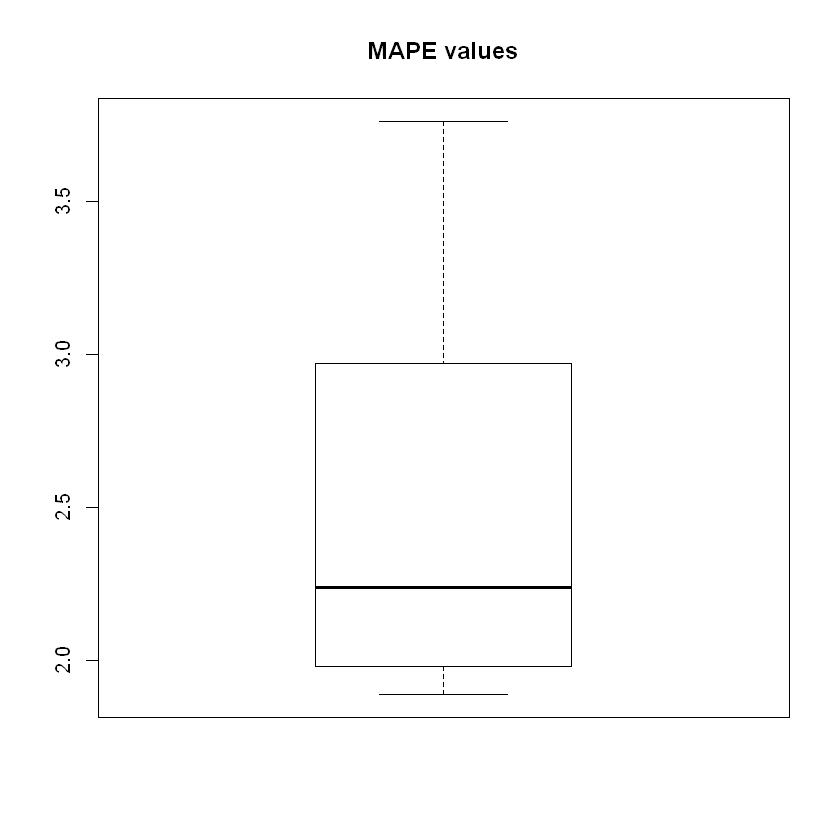

In [28]:
#Let's check the consistency between mean of these mape values and the mape value found above. They must be equal.
#Let's also draw a boxplot diagram for these mape values.
print(paste0("The mean for MAPE values for each hour over the test period is ",mean(mape_task_d_list),". This is consistent with the result found above."))
boxplot(mape_task_d_list,main="MAPE values")

In [29]:
#Let's look at the coefficients of models. For example, let's start with the first model.
print(paste0("For the first model the intercept coefficient is ",coefficients(cv.fit_0)[1],". Other coefficients are as the following"))
as.data.frame(coefficients(cv.fit_0)[-1])

[1] "For the first model the intercept coefficient is 816.731819211494. Other coefficients are as the following"


coefficients(cv.fit_0)[-1]
-0.3395320909
-0.1546382752
-0.0312948644
0.0000000000
0.3283363461
-0.0243647853
-0.0492266089
0.4702021278
0.0000000000
-0.6030080492


We see that there is a great difference between the intercept coefficient and the coefficients of variables. We also see that some of the variable coefficients becomes 0 and the non-zero ones are close to 0. By Lasso regression some variables may be tried to be eliminated by equating its coefficient to 0 and we see this situation here as well. Coefficients which are close to 0 also decrease the variance and MAPE (error) value is decreased as well.

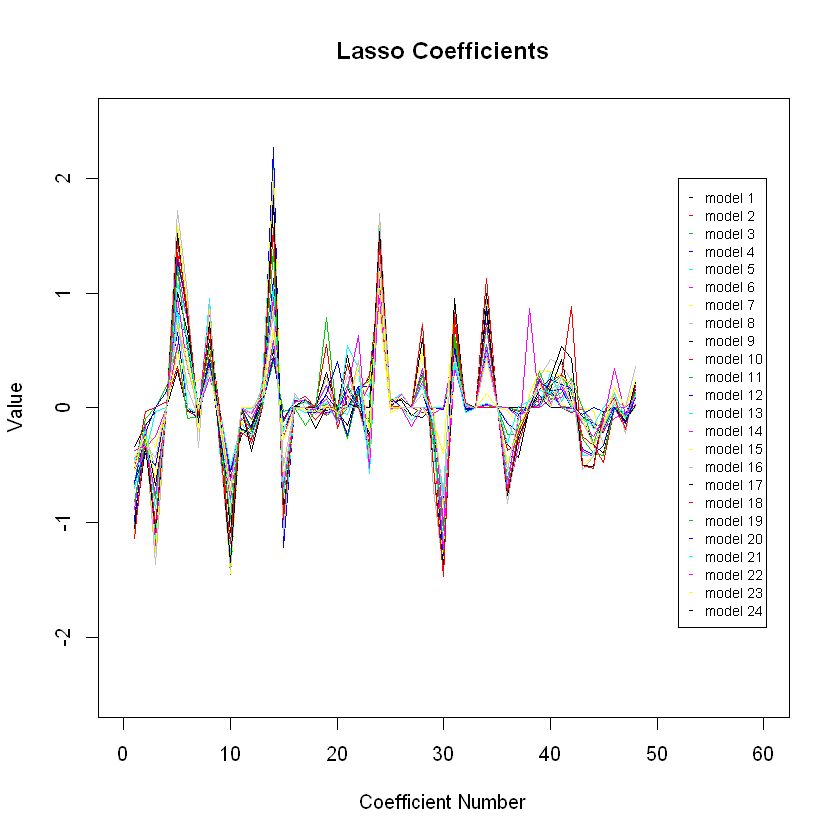

In [30]:
#Let's look at the coefficients of our lasso regression models in a graph. The coefficients are numbered according to
#the order in our training data. For example, the first coefficient is for lag_day_2_hour_0, the second one is for
#lag_day_2_hour_1 etc. There are 48 coefficients in each model like this. (Here, the intercept is excluded.)
plot(coefficients(cv.fit_0)[-1],type="l",col=1,ylim = c(-2.5,2.5),xlim=c(0,60),main="Lasso Coefficients",
     xlab="Coefficient Number",ylab="Value")
points(coefficients(cv.fit_1)[-1],type="l",col=2)
points(coefficients(cv.fit_2)[-1],type="l",col=3)
points(coefficients(cv.fit_3)[-1],type="l",col=4)
points(coefficients(cv.fit_4)[-1],type="l",col=5)
points(coefficients(cv.fit_5)[-1],type="l",col=6)
points(coefficients(cv.fit_6)[-1],type="l",col=7)
points(coefficients(cv.fit_7)[-1],type="l",col=8)
points(coefficients(cv.fit_8)[-1],type="l",col=9)
points(coefficients(cv.fit_9)[-1],type="l",col=10)
points(coefficients(cv.fit_10)[-1],type="l",col=11)
points(coefficients(cv.fit_11)[-1],type="l",col=12)
points(coefficients(cv.fit_12)[-1],type="l",col=13)
points(coefficients(cv.fit_13)[-1],type="l",col=14)
points(coefficients(cv.fit_14)[-1],type="l",col=15)
points(coefficients(cv.fit_15)[-1],type="l",col=16)
points(coefficients(cv.fit_16)[-1],type="l",col=17)
points(coefficients(cv.fit_17)[-1],type="l",col=18)
points(coefficients(cv.fit_18)[-1],type="l",col=19)
points(coefficients(cv.fit_19)[-1],type="l",col=20)
points(coefficients(cv.fit_20)[-1],type="l",col=21)
points(coefficients(cv.fit_21)[-1],type="l",col=22)
points(coefficients(cv.fit_22)[-1],type="l",col=23)
points(coefficients(cv.fit_23)[-1],type="l",col=24)
 par(xpd=TRUE)
legend(52,2,cex = 0.7,
legend = c("model 1","model 2", "model 3","model 4", "model 5","model 6", "model 7",
           "model 8", "model 9","model 10", "model 11","model 12", "model 13","model 14", "model 15",
           "model 16", "model 17","model 18", "model 19","model 20", "model 21","model 22", "model 23", "model 24"), 
col = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23), pch = "-")

With regards to the above graph, we can think that coefficient value moves away from 0 when there is an important change
in the consumption value for that hour compared to previous hour. We also see that coefficient values are generally similar for different models. As an another point, although the coefficient values change in a small interval like between -2 and 2, with regards to the above graph we see quick changes on coefficient values of a model in this interval and this causes a relatively big difference between consecutive or temporally close coefficients of a model. With fused lasso approach these coefficients are tried to get closer to each other.

# Task e (Bonus)

In [31]:
#Here, we are going to make a fused lasso approach. In order to implement it in a simple way, I used the objective function
#min MSE + lambda * sum(abs(Beta[j]-Beta[j-1])) with CVXR package. Normally SSE is used instead of MSE, but when I used SSE
#I got an unexpected solver error from CVXR package and decided to use MSE instead of SSE (with MSE I don't get any error).
#Here in order to find a good value for parameter lambda and to implement fused lasso in a healthy way a cross validation
#is required. However, I could not find a way to make cross validation and used the lambdas found in lasso regression.
#I put them in a list like the following and used each of them with its corresponding dataset in the previous question
#(the same datasets are used in task d and task e). 
lambda_list=c(cv.fit_0$lambda.min,cv.fit_1$lambda.min,cv.fit_2$lambda.min,cv.fit_3$lambda.min,cv.fit_4$lambda.min,
         cv.fit_5$lambda.min,cv.fit_6$lambda.min,cv.fit_7$lambda.min,cv.fit_8$lambda.min,cv.fit_9$lambda.min,
         cv.fit_10$lambda.min,cv.fit_11$lambda.min,cv.fit_12$lambda.min,cv.fit_13$lambda.min,cv.fit_14$lambda.min,
         cv.fit_15$lambda.min,cv.fit_16$lambda.min,cv.fit_17$lambda.min,cv.fit_18$lambda.min,cv.fit_19$lambda.min,
         cv.fit_20$lambda.min,cv.fit_21$lambda.min,cv.fit_22$lambda.min,cv.fit_23$lambda.min)


In [32]:
#Here we solve our objective functions in a loop for each of our models. We also make our predictions for each model
#in this loop. We collect beta and prediction values for each model as well. Here, we are doing things manually and
#we also do a standardization of data. The results are obtained from this standardized data with the X*Beta multiplication
#the result of this multiplication is transformed to its original structure.
library(CVXR)
for (i in 1:24){
    beta=Variable(49)
    lambda=lambda_list[i]
    scaled_training_data=scale(training_data[seq(i,nrow(training_data),24),])
    norm=0
    for (j in 2:25) { norm= norm + abs(beta[j] - beta[j-1]) } #We use difference between consecutive coefficients of lag_day2.
    for (j in 26:49) { norm= norm + abs(beta[j] - beta[j-1]) } #We use difference between consecutive coefficients of lag_day7.
    #This seperation is necessary between coefficients of lag_day2 and lag_day7 while calculating the penalty in fused lasso.
    obj = sum_squares(scaled_training_data[,1] - (cbind(1,as.matrix(scaled_training_data[,2:49]))) %*% beta) / (nrow(scaled_training_data[,2:49])) + lambda * norm
    prob = Problem(Minimize(obj))
    result = solve(prob)
        
    
    
    m=mean(testing_data[seq(i,nrow(testing_data),24),][,1])
    sd=sd(testing_data[seq(i,nrow(testing_data),24),][,1])
    scaled_testing_data=scale(testing_data[seq(i,nrow(testing_data),24),])
    
    
    assign(paste0("prediction_y_",i),((cbind(1,as.matrix(scaled_testing_data[,2:49]))) %*% result$getValue(beta))*sd+m)
    assign(paste0("beta_",i),result$getValue(beta))
    
}

#We produce our prediction vector and fill inside of it with our predictions for each hour and each day in the right order
#in order to make a healthy comparison.

prediction_y=vector()
for (i in 1:length(prediction_y_1)){
    prediction_y=c(prediction_y,prediction_y_1[i])
    prediction_y=c(prediction_y,prediction_y_2[i])
    prediction_y=c(prediction_y,prediction_y_3[i])
    prediction_y=c(prediction_y,prediction_y_4[i])
    prediction_y=c(prediction_y,prediction_y_5[i])
    prediction_y=c(prediction_y,prediction_y_6[i])
    prediction_y=c(prediction_y,prediction_y_7[i])
    prediction_y=c(prediction_y,prediction_y_8[i])
    prediction_y=c(prediction_y,prediction_y_9[i])
    prediction_y=c(prediction_y,prediction_y_10[i])
    prediction_y=c(prediction_y,prediction_y_11[i])
    prediction_y=c(prediction_y,prediction_y_12[i])
    prediction_y=c(prediction_y,prediction_y_13[i])
    prediction_y=c(prediction_y,prediction_y_14[i])
    prediction_y=c(prediction_y,prediction_y_15[i])
    prediction_y=c(prediction_y,prediction_y_16[i])
    prediction_y=c(prediction_y,prediction_y_17[i])
    prediction_y=c(prediction_y,prediction_y_18[i])
    prediction_y=c(prediction_y,prediction_y_19[i])
    prediction_y=c(prediction_y,prediction_y_20[i])
    prediction_y=c(prediction_y,prediction_y_21[i])
    prediction_y=c(prediction_y,prediction_y_22[i])
    prediction_y=c(prediction_y,prediction_y_23[i])
    prediction_y=c(prediction_y,prediction_y_24[i])
}

#We compare our prediction vector with real data (test y) and find our mape value.

mape_task_e=(sum(abs((as.data.frame(prediction_y) - as.data.frame(testing_data[,1])) / as.data.frame(testing_data[,1])))/length(testing_data[,1])) * 100
print(paste('MAPE for the approach in task e is ',mape_task_e))


Attaching package: 'CVXR'

The following object is masked from 'package:dplyr':

    id

The following object is masked from 'package:stats':

    power



[1] "MAPE for the approach in task e is  3.37545552025851"


Although the lambda values are not set in a healthy way, our fused lasso approach performed better than 3 of our 5 previous approaches in terms of MAPE. We can say that this shows the strength of the fused lasso approach. 

In [33]:
#Let's put mape values in a vector for each hour in the test period.
mape_task_e_list=vector()
for (i in 1:24){
    mape=(sum(abs((as.data.frame(prediction_y[seq(i,length(prediction_y),24)]) - as.data.frame(testing_data[,1][seq(i,length(prediction_y),24)])) / as.data.frame(testing_data[,1][seq(i,length(prediction_y),24)])))/length(testing_data[,1][seq(i,length(prediction_y),24)])) * 100
    mape_task_e_list=c(mape_task_e_list,mape)
}
    

[1] "The mean for MAPE values for each hour over the test period is 3.37545552025851. This is consistent with the result found above."


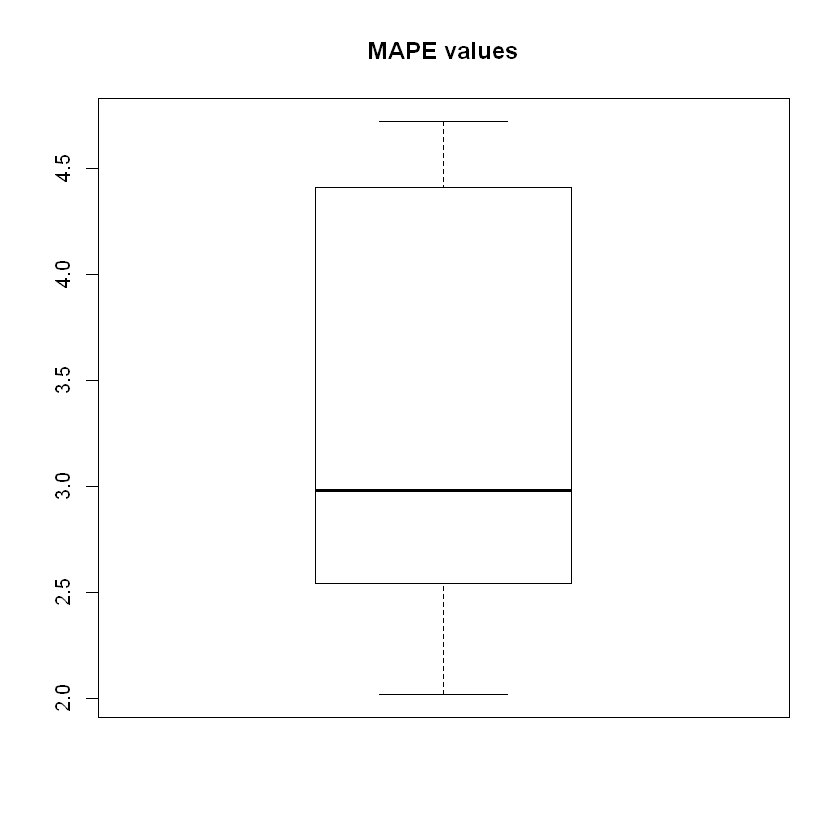

In [34]:
#Let's check the consistency between mean of these mape values and the mape value found above. They must be equal.
#Let's also draw a boxplot diagram for these mape values.
print(paste0("The mean for MAPE values for each hour over the test period is ",mean(mape_task_e_list),". This is consistent with the result found above."))
boxplot(mape_task_e_list,main="MAPE values")

In [35]:
#Let's look at the coefficients of models. For example, let's start with the first model.
print(paste0("For the first model the intercept coefficient is ",beta_1[1],". Other coefficients are as the following"))
as.data.frame(beta_1[-1])

[1] "For the first model the intercept coefficient is 0.0415896092472461. Other coefficients are as the following"


beta_1[-1]
0.0415896418
0.0415896437
0.0415896165
0.0415895424
0.0415893276
-0.0385948557
-0.0385956949
-0.0385958448
-0.0385958994
-0.0385959046


We see that coefficients (this time all coefficients including the intercept) are close to 0 and they are close to each other as well. There are not quick changes in the values of coefficients (especially for the consecutive coefficients) and this was one of our aims while using fused lasso regression in our time series data.

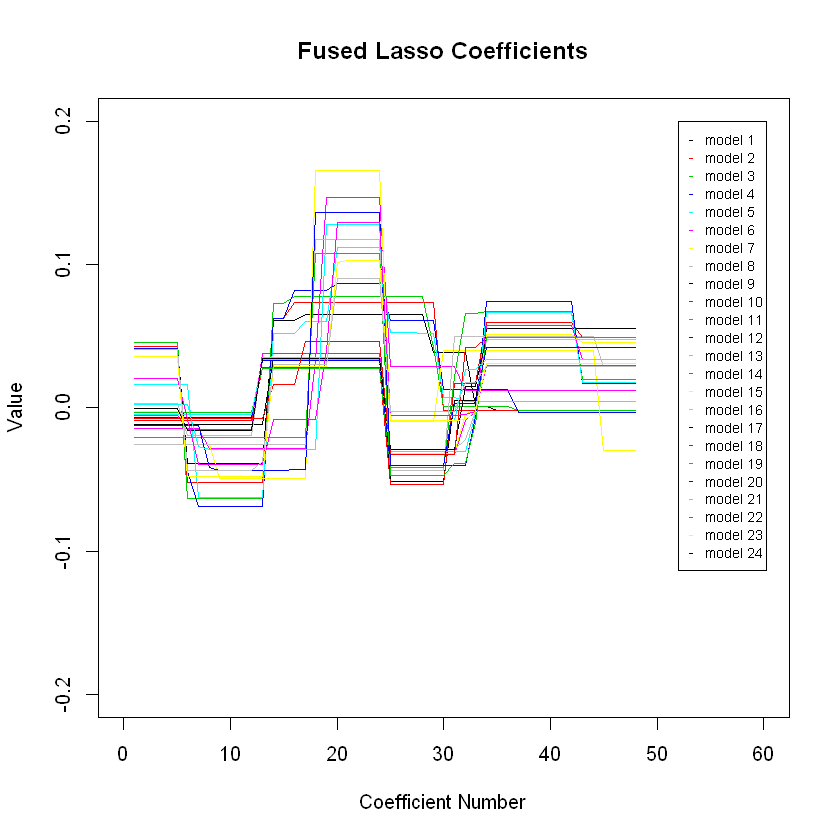

In [36]:
#Let's look at the coefficients of our fused lasso regression models in a graph. The coefficients are numbered according to
#the order in our training data. For example, the first coefficient is for lag_day_2_hour_0, the second one is for
#lag_day_2_hour_1 etc. There are 48 coefficients in each model like this. (Here, the intercept is excluded.)
plot(beta_1[-1],type="l",col=1,ylim = c(-0.2,0.2),xlim=c(0,60),main="Fused Lasso Coefficients",
     xlab="Coefficient Number",ylab="Value")
points(beta_2[-1],type="l",col=2)
points(beta_3[-1],type="l",col=3)
points(beta_4[-1],type="l",col=4)
points(beta_5[-1],type="l",col=5)
points(beta_6[-1],type="l",col=6)
points(beta_7[-1],type="l",col=7)
points(beta_8[-1],type="l",col=8)
points(beta_9[-1],type="l",col=9)
points(beta_10[-1],type="l",col=10)
points(beta_11[-1],type="l",col=11)
points(beta_12[-1],type="l",col=12)
points(beta_13[-1],type="l",col=13)
points(beta_14[-1],type="l",col=14)
points(beta_15[-1],type="l",col=15)
points(beta_16[-1],type="l",col=16)
points(beta_17[-1],type="l",col=17)
points(beta_18[-1],type="l",col=18)
points(beta_19[-1],type="l",col=19)
points(beta_20[-1],type="l",col=20)
points(beta_21[-1],type="l",col=21)
points(beta_22[-1],type="l",col=22)
points(beta_23[-1],type="l",col=23)
points(beta_24[-1],type="l",col=24)
 par(xpd=TRUE)
legend(52,0.2,cex = 0.7,
legend = c("model 1","model 2", "model 3","model 4", "model 5","model 6", "model 7",
           "model 8", "model 9","model 10", "model 11","model 12", "model 13","model 14", "model 15",
           "model 16", "model 17","model 18", "model 19","model 20", "model 21","model 22", "model 23","model 24"), 
col = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23), pch = "-")

The graph above is consistent with our inferences that we made from Beta_1. We see that as an important gain thanks to fused lasso approach the coefficients of our models (especially the coefficients of consecutive variables) are close to each other.

# Task f

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


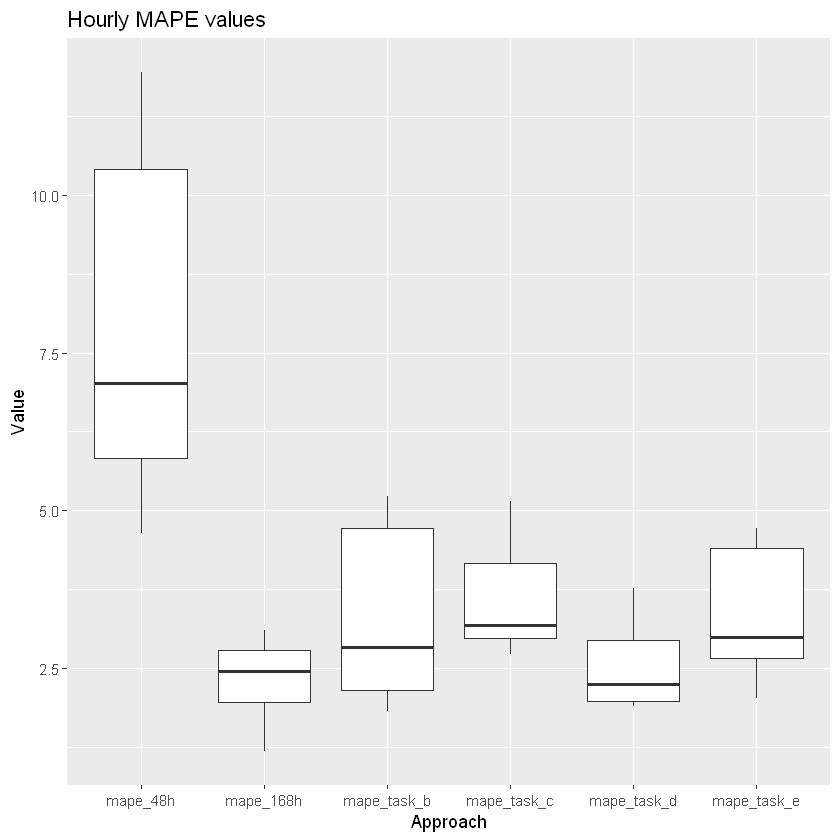

In [37]:
#Let's collect all of our mape lists that have the mape values for each hour in the test period for each approaches in a boxplot
#diagram.
library(ggplot2)
df1=data.frame(value=mape_48h_list,group="mape_48h")
df2=data.frame(value=mape_168h_list,group="mape_168h")
df3=data.frame(value=mape_task_b_list,group="mape_task_b")
df4=data.frame(value=mape_task_c_list,group="mape_task_c")
df5=data.frame(value=mape_task_d_list,group="mape_task_d")
df6=data.frame(value=mape_task_e_list,group="mape_task_e")
df=rbind(df1,df2,df3,df4,df5,df6)
ggplot(df, aes(factor(group), value)) + geom_boxplot() + labs( title = "Hourly MAPE values",x="Approach",y="Value")

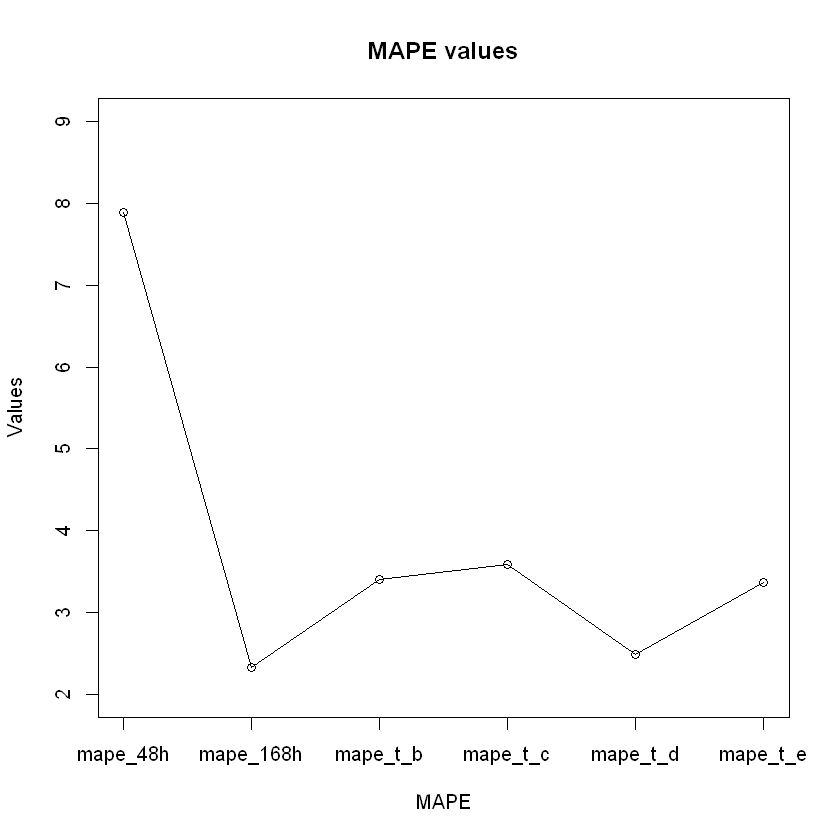

In [38]:
#Let's also show our average or general mape values with the line graph as the following for each of the approaches.
plot(xaxt="n",ylim=c(2,9),
     c(mape_48h,mape_168h,mape_task_b,mape_task_c,mape_task_d,mape_task_e),type="o",main="MAPE values",xlab="MAPE",ylab="Values")
axis(1,at=seq_along(c(mape_48h,mape_168h,mape_task_b,mape_task_c,mape_task_d,mape_task_e)),labels = c("mape_48h","mape_168h","mape_t_b","mape_t_c","mape_t_d","mape_t_e"))

With regards to the above graphs we see that our MAPE values are, generally, around 2 and 3 and naive approach with 48 hours seems as a bad approach. It has big MAPE values changing in a big interval. However, naive approach with 168 hours seems as a very good approach with the smallest MAPE values changing in a small interval. We also see that lasso approaches are successful as well. Especially, the lasso approach in task d seems very similar to naive approach with 168 hours. We must also add that if a good cross-validation operation had been done while defining lambda value, performance of fused lasso would be better than now as well.

*In the above plot mape_48h and mape_168h are mape values obtained in task a. Other mape values were obtained from task b, task c, task d (lasso) and task e (fused lasso), respectively. 